# ENTREGA FINAL DEL PROYECTO

## ⚡ Proyecto Cars Sales - Comision 32700 - Data Science CoderHouse ⚡

🔸Alumno: Arturo Ledezma y Alex Arce

🔸Profesor: Norberto Leon Gonzales

🔸Tutor: Rogelio Tobar de la Cruz

### 1) Contexto Comercial:

Con la escasez de chips para la fabricación de nuevos modelos y en consecuencia abastecer la demanda actual de autos, hemos visto un incremento en la demanda o decisión de compra sobre automóviles usados para la región de Estados Unidos, objeto del presente estudio.

El comportamiento del mercado de segunda mano podría significar una oportunidad de negocio para nuevos competidores o concesionarios enfocados específicamente a los automóviles de segunda mano, pero también podría significar una alternativa o solución estratégica que las agencias actuales pueden capitalizar en los recambios de autos ( auto nuevo por auto usado o consignación).

Pero ¿Qué gama de marcas, modelos pueden llegar a ser los más atractivos del mercado y que puedan traducirse en una ventaja competitiva?

### 2) Descripción de los datos:

El dataset continue 23 columnas y 19514 filas; siendo a detalle las siguientes columnas: Date, Dealer_Name, Company,Model ,Year ,Years_old, Body Style,Transmission,Color,Price,Mileage_km,Fuel,engine_capacity,drivetrain, Dealer_Add,Customer Address,CouncilArea,Gender,Annual Income,Dealer_Location,Dealer_No ,Dealer_Region.

### 3) Limitaciones:

El alcance de los datos comprende los registros de venta de 2021 solo para la región de Estados Unidos

### 4) Objetivo:

La finalidad del proyecto es realizar un análisis exploratorio del dataset para encontrar patrones en la información que nos ayuden a estudiar las correlaciones más importantes que ayuden a elaborar un modelo de predicción (regresión) paralas ventas de automóviles usados de los siguientes periodos para lo que se emplearan distintas librerías de ciencia de datos en Python ( pandas, numpy, Matplotlib, Seaborn, etc.) ; esperamos además poder tener hallazgos que permitan optimizar estrategias de venta y con ello capturar mayor ingreso por unidad vendida.

### 5) Las preguntas de estudio:

🎯 ¿Qué factores son determinantes para definir el precio del auto?

🎯 ¿Cómo afecta el tipo de transmisión a la fijación del precio?

🎯 ¿Qué Transmisión representa mas ingresos para el vendedor?

🎯 ¿Cómo afecta el color a la fijación del precio?

🎯 ¿Qué color representa mas ingresos para el vendedor?

🎯 ¿Cómo afecta la marca y tipo de vehículo a la determinación del precio?

🎯 ¿Qué marca y tipo de vehículo representa mas ingresos para el vendedor?

🎯 ¿La ubicación del vendedor tiene algún efecto en el precio?

🎯 ¿Qué probabilidad de venta existe por genero del comprador “mujer-hombre”?

🎯 ¿Cuál es el ingreso promedio anual del consumidor que mas conviene a los vendedores de autos?



# Información del dataset

In [251]:
#CARGAR LIBRERIAS
import pandas as pd
import numpy as np
import datetime as dt
import calendar
import plotly.express as px

#librerias visuales
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns




In [252]:
#CARGAR DATASET
df_Carsales=pd.read_excel('Carsales_b.xlsx')
df_Carsales.head(2)

Date Customer Name         Dealer_Name Company    Model  Year  \
0 2021-09-24         Micah   Chrysler Plymouth   Acura      MDX  2000   
1 2021-07-05         Josue  Diehl Motor CO Inc   Acura  Integra  2000   

  Body Style Transmission   Color  Price  ...  engine_capacity drivetrain  \
0        suv    automatic  silver   5000  ...              3.5        all   
1  hatchback   mechanical   white   6000  ...              1.8      front   

           Dealer_Add      Customer Address               CouncilArea Gender  \
0      4376 Ogden Ave  16/557 Glenferrie Rd   Boroondara City Council   Male   
1  8612 Research Blvd     26/670 Malvern Rd  Stonnington City Council   Male   

  Annual Income Dealer_Location  Dealer_No  Dealer_Region  
0        335000    6137 S Us-51  53546-9427    Janesville  
1        888000    44 Walnut St  06457-3834    Middletown  

[2 rows x 22 columns]

In [253]:
#DIMENSIONES DEL DATASET
df_Carsales.shape

(19514, 22)

### Etapa de Data Wrangling

Identificamos valores nulos dentro del DS Cars Sales, la medida que se tomo fue quitarlas para que no afecte en futuros arreglos. luego se agregaron variantes para cumplir con el minimo de estas como proyecto.

In [254]:
df_Carsales.isnull().sum()

Date                0
Customer Name       0
Dealer_Name         0
Company             0
Model               0
Year                0
Body Style          0
Transmission        0
Color               0
Price               0
Mileage_km          0
Fuel                0
engine_capacity     8
drivetrain          0
Dealer_Add          0
Customer Address    0
CouncilArea         1
Gender              0
Annual Income       0
Dealer_Location     0
Dealer_No           0
Dealer_Region       0
dtype: int64

In [255]:
#TIPOS DE DATOS DEL DATASET
df_Carsales['Date']=pd.to_datetime(df_Carsales['Date'])
df_Carsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19514 entries, 0 to 19513
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              19514 non-null  datetime64[ns]
 1   Customer Name     19514 non-null  object        
 2   Dealer_Name       19514 non-null  object        
 3   Company           19514 non-null  object        
 4   Model             19514 non-null  object        
 5   Year              19514 non-null  int64         
 6   Body Style        19514 non-null  object        
 7   Transmission      19514 non-null  object        
 8   Color             19514 non-null  object        
 9   Price             19514 non-null  int64         
 10  Mileage_km        19514 non-null  int64         
 11  Fuel              19514 non-null  object        
 12  engine_capacity   19506 non-null  float64       
 13  drivetrain        19514 non-null  object        
 14  Dealer_Add        1951

In [256]:
df_Carsales.describe().T

count           mean            std      min       25%  \
Year             19514.0    2007.581377       5.062360   2000.0    2003.0   
Price            19514.0    9235.045660    6665.185396    150.0    4800.0   
Mileage_km       19514.0  214692.157887  113478.960014      0.0  138000.0   
engine_capacity  19506.0       2.113719       0.741869      0.2       1.6   
Annual Income    19514.0  825555.940555  709544.133651  13500.0  400000.0   

                      50%        75%         max  
Year               2007.0     2011.0      2019.0  
Price              7500.0    11500.0     50000.0  
Mileage_km       207000.0   288000.0   1000000.0  
engine_capacity       2.0        2.4         6.8  
Annual Income    735000.0  1156000.0  11200000.0

In [257]:
df_Carsales.drop_duplicates()

Date Customer Name  \
0     2021-09-24         Micah   
1     2021-07-05         Josue   
2     2021-10-28       Shloime   
3     2021-10-28        Julian   
4     2021-10-28      Mohammed   
...          ...           ...   
19509 2021-07-29        Martin   
19510 2021-07-29       Olivier   
19511 2021-07-29         Sasha   
19512 2021-07-29          Shea   
19513 2021-03-09          Eric   

                                           Dealer_Name Company    Model  Year  \
0                                    Chrysler Plymouth   Acura      MDX  2000   
1                                   Diehl Motor CO Inc   Acura  Integra  2000   
2                    Scrivener Performance Engineering   Acura       TL  2002   
3      Progressive Shippers Cooperative Association No   Acura      MDX  2002   
4                                 Rabun Used Car Sales   Acura      MDX  2002   
...                                                ...     ...      ...   ...   
19509                                    Race Car Help   Volvo     XC90  2016   
19510                           Chrysler of Tri-Cities   Volvo     XC60  2016   
19511                      Motor Vehicle Branch Office   Volvo      S60  2017   
19512                                   Nebo Chevrolet   Volvo      V90  2017   
19513  Progressive Shippers Cooperative Association No   Volvo      V60  2018   

      Body Style Transmission   Color  Price  ...  engine_capacity drivetrain  \
0            suv    automatic  silver   5000  ...              3.5        all   
1      hatchback   mechanical   white   6000  ...              1.8      front   
2          sedan    automatic   white   3850  ...              3.2      front   
3            suv    automatic  silver   8999  ...              3.5        all   
4            suv    automatic  silver   6500  ...              3.5        all   
...          ...          ...     ...    ...  ...              ...        ...   
19509        suv    automatic   white  44023  ...              2.0        all   
19510        suv    automatic   black  22900  ...              2.0      front   
19511      sedan    automatic    grey  17900  ...              2.0        all   
19512  universal    automatic    grey  41400  ...              2.0        all   
19513  universal    automatic    grey  26500  ...              2.0        all   

               Dealer_Add      Customer Address               CouncilArea  \
0          4376 Ogden Ave  16/557 Glenferrie Rd   Boroondara City Council   
1      8612 Research Blvd     26/670 Malvern Rd  Stonnington City Council   
2      137 Green Tree Trl           1 Howell St   Whittlesea City Council   
3      8532 Research Blvd            22 Ross St    Glen Eira City Council   
4         3250 W Marie St       72 Bayswater Rd    Melbourne City Council   
...                   ...                   ...                       ...   
19509  6886 E McDowell Rd         151 Nelson Pl  Hobsons Bay City Council   
19510  8752 Research Blvd           5 Scenic Pl  Maribyrnong City Council   
19511      4343 Ogden Ave         10/21 Bent St    Glen Eira City Council   
19512      4492 Ogden Ave         12 Glacier St         Hume City Council   
19513  8578 Research Blvd         9/26 Davis Av    Melbourne City Council   

       Gender Annual Income     Dealer_Location  Dealer_No  Dealer_Region  
0        Male        335000        6137 S Us-51  53546-9427    Janesville  
1        Male        888000        44 Walnut St  06457-3834    Middletown  
2        Male        560000    3 Green Tree Trl  38701-8047    Greenville  
3        Male        895000        6137 S Us-51  53546-9427    Janesville  
4        Male       1271000  6640 E McDowell Rd  85257-3102    Scottsdale  
...       ...           ...                 ...         ...           ...  
19509    Male       2400000  8501 Research Blvd  78758-7841        Austin  
19510    Male       1770000     3203 W Marie St  99301-3882         Pasco  
19511    Male        420000  8501 Research Blvd 

 No hay valores duplicados

In [258]:
#PREPARANDO EL DATASET PARA SU ANALISIS 
#agregar columna de numero de mes para despues obtener el nombre del mes
df_Carsales['Months']=df_Carsales['Date'].dt.month
#obtener nombre del mes
df_Carsales['Month_name'] = df_Carsales['Months'].apply(lambda x: calendar.month_name[x])
df_Carsales['Year_Month']=df_Carsales['Date'].dt.strftime('%Y-%m')
df_Carsales['yy']=df_Carsales['Date'].dt.strftime('%Y')
df_Carsales['mm']=df_Carsales['Date'].dt.strftime('%m')
df_Carsales.head(2)

Date Customer Name         Dealer_Name Company    Model  Year  \
0 2021-09-24         Micah   Chrysler Plymouth   Acura      MDX  2000   
1 2021-07-05         Josue  Diehl Motor CO Inc   Acura  Integra  2000   

  Body Style Transmission   Color  Price  ...  Gender Annual Income  \
0        suv    automatic  silver   5000  ...    Male        335000   
1  hatchback   mechanical   white   6000  ...    Male        888000   

   Dealer_Location  Dealer_No  Dealer_Region Months Month_name Year_Month  \
0     6137 S Us-51  53546-9427    Janesville      9  September    2021-09   
1     44 Walnut St  06457-3834    Middletown      7       July    2021-07   

     yy  mm  
0  2021  09  
1  2021  07  

[2 rows x 27 columns]

In [259]:
#Agregamos una columna que nos de los años de antigûedad del auto a partir del año de venta (2021)

#df_Carsales['yy']=df_Carsales['yy'].astype(int)
#df_Carsales['Years_old1']=df_Carsales['yy']-df_Carsales['Year']
dataset_year=2021
df_Carsales['Years_old']=dataset_year-df_Carsales['Year']
df_Carsales.head()

Date Customer Name                                      Dealer_Name  \
0 2021-09-24         Micah                                Chrysler Plymouth   
1 2021-07-05         Josue                               Diehl Motor CO Inc   
2 2021-10-28       Shloime                Scrivener Performance Engineering   
3 2021-10-28        Julian  Progressive Shippers Cooperative Association No   
4 2021-10-28      Mohammed                             Rabun Used Car Sales   

  Company    Model  Year Body Style Transmission   Color  Price  ...  \
0   Acura      MDX  2000        suv    automatic  silver   5000  ...   
1   Acura  Integra  2000  hatchback   mechanical   white   6000  ...   
2   Acura       TL  2002      sedan    automatic   white   3850  ...   
3   Acura      MDX  2002        suv    automatic  silver   8999  ...   
4   Acura      MDX  2002        suv    automatic  silver   6500  ...   

   Annual Income     Dealer_Location  Dealer_No  Dealer_Region Months  \
0         335000        6137 S Us-51  53546-9427    Janesville      9   
1         888000        44 Walnut St  06457-3834    Middletown      7   
2         560000    3 Green Tree Trl  38701-8047    Greenville     10   
3         895000        6137 S Us-51  53546-9427    Janesville     10   
4        1271000  6640 E McDowell Rd  85257-3102    Scottsdale     10   

  Month_name Year_Month    yy  mm Years_old  
0  September    2021-09  2021  09        21  
1       July    2021-07  2021  07        21  
2    October    2021-10  2021  10        19  
3    October    2021-10  2021  10        19  
4    October    2021-10  2021  10        19  

[5 rows x 28 columns]

In [260]:
#creamos rangos con la antiûedad del auto (no usamos la opción de bins para poder personalizar la etiqueta a mostrar)

mask1 = np.logical_and(df_Carsales.Years_old >= 0, df_Carsales.Years_old <= 5)
df_Carsales.loc[mask1, ['Years_range']] = "0 to 5"

mask2 = np.logical_and(df_Carsales.Years_old > 5, df_Carsales.Years_old <= 10)
df_Carsales.loc[mask2, ['Years_range']] = "6 to 10"

mask3 = np.logical_and(df_Carsales.Years_old > 10, df_Carsales.Years_old <= 15)
df_Carsales.loc[mask3, ['Years_range']] = "11 to 15"

mask4 = np.logical_and(df_Carsales.Years_old > 15, df_Carsales.Years_old <= 20)
df_Carsales.loc[mask4, ['Years_range']] = "16 to 20"

df_Carsales['Years_range'].fillna(" > to 20", inplace = True)


df_Carsales.head()


Date Customer Name                                      Dealer_Name  \
0 2021-09-24         Micah                                Chrysler Plymouth   
1 2021-07-05         Josue                               Diehl Motor CO Inc   
2 2021-10-28       Shloime                Scrivener Performance Engineering   
3 2021-10-28        Julian  Progressive Shippers Cooperative Association No   
4 2021-10-28      Mohammed                             Rabun Used Car Sales   

  Company    Model  Year Body Style Transmission   Color  Price  ...  \
0   Acura      MDX  2000        suv    automatic  silver   5000  ...   
1   Acura  Integra  2000  hatchback   mechanical   white   6000  ...   
2   Acura       TL  2002      sedan    automatic   white   3850  ...   
3   Acura      MDX  2002        suv    automatic  silver   8999  ...   
4   Acura      MDX  2002        suv    automatic  silver   6500  ...   

      Dealer_Location  Dealer_No   Dealer_Region Months Month_name Year_Month  \
0        6137 S Us-51  53546-9427     Janesville      9  September    2021-09   
1        44 Walnut St  06457-3834     Middletown      7       July    2021-07   
2    3 Green Tree Trl  38701-8047     Greenville     10    October    2021-10   
3        6137 S Us-51  53546-9427     Janesville     10    October    2021-10   
4  6640 E McDowell Rd  85257-3102     Scottsdale     10    October    2021-10   

     yy  mm  Years_old Years_range  
0  2021  09         21     > to 20  
1  2021  07         21     > to 20  
2  2021  10         19    16 to 20  
3  2021  10         19    16 to 20  
4  2021  10         19    16 to 20  

[5 rows x 29 columns]

# VISUALIZACIONES GENERALES

In [261]:
#segmentacion dataframe
df_income=df_Carsales.filter(['yy','Month_name','mm','Price'],axis=1)
df_income['yy'].astype(int)
df_income=df_income.groupby(['yy','mm','Month_name'])['Price'].agg('sum').round(1).reset_index()
df_income.head(2)

yy  mm Month_name    Price
0  2021  01    January    18590
1  2021  02   February  3756631

In [262]:
#union de index y campo calculado de price in thousands
df_income=pd.pivot_table(df_income,values='Price',index=['mm','Month_name'],columns=['yy']).reset_index().fillna (0)
df_income.head(2)

yy  mm Month_name     2021
0   01    January    18590
1   02   February  3756631

In [263]:
#indexamos los meses
df_income.index=df_income['Month_name']
df_income.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='Month_name')

In [264]:
df_income=df_income.drop("Month_name",axis=1)
df_income.head(2)

yy          mm     2021
Month_name             
January     01    18590
February    02  3756631

In [265]:
df_income=df_income.drop("mm",axis=1)
df_income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, January to December
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2021    12 non-null     int64
dtypes: int64(1)
memory usage: 192.0+ bytes


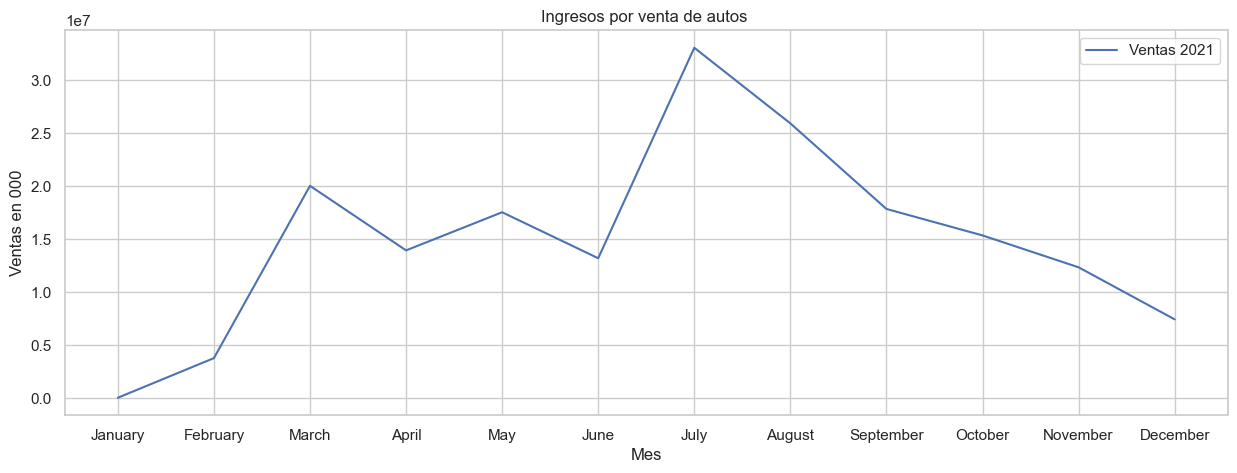

In [266]:
#Graficarlo
#tamaño figura
fig, ax=plt.subplots(figsize=(15,5)) 
# plot de x,y
x=df_income.index
y=df_income.sum(axis='columns').round(2)

y1=df_income['2021']
ax.plot(x,y1, label='Ventas 2021')
#Etiquetas
ax.set_xlabel('Mes')
ax.set_ylabel('Ventas en 000')
#Titulos
ax.set_title("Ingresos por venta de autos ")
ax.legend()
plt.show()

In [267]:

df_Gender=df_Carsales.filter(['mm','Month_name','Gender','Price'],axis=1)
df_Gender=df_Gender.groupby(['mm','Month_name','Gender'])['Price'].agg('sum').round(1).reset_index()
df_Gender.head(10)

mm Month_name  Gender     Price
0  01    January  Female     18590
1  02   February  Female    644887
2  02   February    Male   3111744
3  03      March  Female   4675423
4  03      March    Male  15332277
5  04      April  Female   2999110
6  04      April    Male  10919359
7  05        May  Female   4284583
8  05        May    Male  13230417
9  06       June  Female   2775191

In [268]:
df_Gender=pd.pivot_table(df_Gender,values='Price',index=['mm','Month_name'],columns=['Gender']).reset_index()
#df_Gender.fillna(0)
df_Gender.head(3)

Gender  mm Month_name     Female        Male
0       01    January    18590.0         NaN
1       02   February   644887.0   3111744.0
2       03      March  4675423.0  15332277.0

In [269]:
df_Gender.index=df_Gender['Month_name']
df_Gender.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='Month_name')

In [270]:
df_Gender['Male'] = df_Gender['Male'].fillna(0)
df_Gender.head(3)

Gender      mm Month_name     Female        Male
Month_name                                      
January     01    January    18590.0         0.0
February    02   February   644887.0   3111744.0
March       03      March  4675423.0  15332277.0

AttributeError: 'AxesSubplot' object has no attribute 'set_ytickslabels'

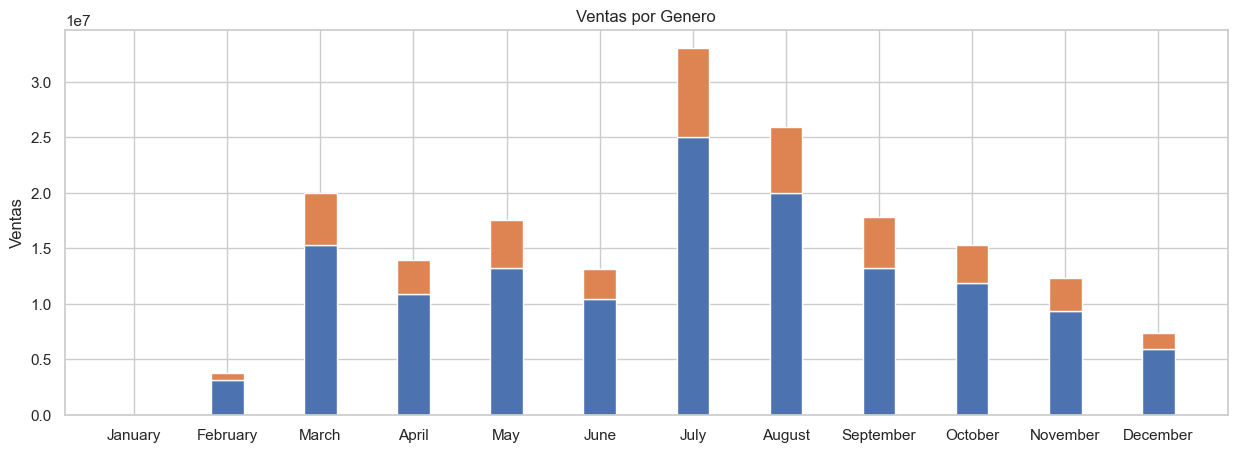

In [271]:

labels =df_Gender.index
men_means = df_Gender['Male']
women_means = df_Gender['Female']
#men_std = [2, 3, 4, 1, 2]
#women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(15,5))

ax.bar(labels, men_means, width, label='Hombres')
ax.bar(labels, women_means, width,bottom=men_means,
       label='Mujeres')

ax.set_ylabel('Ventas')
ax.set_title('Ventas por Genero')
ax.set_ytickslabels([])
ax.legend()

plt.show()

# INSIGHT


El genero que mas compra autos es el de los hombres,los meses con mayor volumen de transacciones son Marzo, Julio y Agosto. Los meses con volumenes muy bajos de ventas son Enero, Febrero y Diciembre


In [272]:
df_Company=df_Carsales.filter(['Company','Price'],axis=1)
df_Company=df_Company.groupby(['Company'])['Price'].agg('sum').round(1).reset_index()
df_Company.head(2)

Company   Price
0       Acura  553956
1  Alfa Romeo  269579

In [273]:
df_Company.index=df_Company['Company']
df_Company.index

Index(['Acura', 'Alfa Romeo', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chery',
       'Chevrolet', 'Chrysler', 'Citroen', 'Dacia', 'Daewoo', 'Dodge', 'Fiat',
       'Ford', 'Geely', 'Great Wall', 'Honda', 'Hyundai', 'Infiniti', 'Iveco',
       'Jaguar', 'Jeep', 'Kia', 'Lancia', 'Land Rover', 'Lexus', 'Lifan',
       'Lincoln', 'Mazda', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan',
       'Opel', 'Peugeot', 'Pontiac', 'Porsche', 'Renault', 'Rover', 'Saab',
       'Seat', 'Skoda', 'SsangYong', 'Subaru', 'Suzuki', 'Toyota',
       'Volkswagen', 'Volvo'],
      dtype='object', name='Company')

In [274]:
fig = px.treemap(df_Company, path=['Company'], values='Price',color_continuous_scale=px.colors.sequential.ice,
                  color='Price',title="Ventas por Marca")
                
   
fig.update_traces(root_color="black",hovertemplate='Company: %{label} <br>MTS: %{value}<br>AMOUNT: %{color:,.1f}') 
fig.update_layout(margin = dict(t=50, l=25, r=25, b=10))
fig.show()




# INSIGHT

Los Autos que representan la mayor venta son de la Marca VW,BMW, Mercedes,Skoda,Audi,Toyota Opel y Ford. Como segundo grupo de ventas vemos Peugeot, Hyundai,Mazda,Honda

In [275]:
#segmentacion dataframe
df_ysale_ycar=df_Carsales.filter(['mm','Month_name','Years_range','Price'],axis=1)
#df_ysale_ycar['yy'].astype(int)
#df_ysale_ycar['Year'].astype(object)
df_ysale_ycar=df_ysale_ycar.groupby(['mm','Month_name','Years_range'])['Price'].agg('sum').round(1).reset_index()
df_ysale_ycar.head(2)

mm Month_name Years_range   Price
0  01    January    11 to 15   18590
1  02   February     > to 20  232592

In [276]:
df_ysale_ycar2=pd.pivot_table(df_ysale_ycar,values='Price',index=['mm','Month_name'],columns=['Years_range']).reset_index()
df_ysale_ycar2['0 to 5'] = df_ysale_ycar2['0 to 5'].fillna(0)
df_ysale_ycar2['6 to 10'] = df_ysale_ycar2['6 to 10'].fillna(0)
df_ysale_ycar2['11 to 15'] = df_ysale_ycar2['11 to 15'].fillna(0)
df_ysale_ycar2['16 to 20'] = df_ysale_ycar2['16 to 20'].fillna(0)
df_ysale_ycar2[' > to 20'] = df_ysale_ycar2[' > to 20'].fillna(0)
df_ysale_ycar = df_ysale_ycar2[['mm','Month_name','0 to 5','6 to 10','11 to 15','16 to 20',' > to 20']]
df_ysale_ycar

Years_range  mm Month_name      0 to 5     6 to 10    11 to 15   16 to 20  \
0            01    January         0.0         0.0     18590.0        0.0   
1            02   February    232761.0   1232173.0   1838997.0   220108.0   
2            03      March  12007976.0   3199827.0   3717237.0   612234.0   
3            04      April   1122352.0   3902493.0   7125635.0  1180607.0   
4            05        May    689156.0   3103579.0   8348042.0  4973576.0   
5            06       June    654745.0   2464355.0   5448132.0  4186393.0   
6            07       July   6022246.0  19956120.0   3615910.0  2878206.0   
7            08     August    640016.0  11293950.0  10251773.0  3227081.0   
8            09  September   2909870.0   5393160.0   8817635.0   493366.0   
9            10    October    923447.0   3924700.0   4196747.0  5760632.0   
10           11   November    833040.0   3297584.0   3520744.0  4249972.0   
11           12   December    451835.0   1369071.0   1460886.0  3915035.0   

Years_range   > to 20  
0                 0.0  
1            232592.0  
2            470426.0  
3            587382.0  
4            400647.0  
5            424219.0  
6            558102.0  
7            484143.0  
8            212301.0  
9            524087.0  
10           420772.0  
11           216016.0

In [277]:
df_ysale_ycar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mm          12 non-null     object 
 1   Month_name  12 non-null     object 
 2   0 to 5      12 non-null     float64
 3   6 to 10     12 non-null     float64
 4   11 to 15    12 non-null     float64
 5   16 to 20    12 non-null     float64
 6    > to 20    12 non-null     float64
dtypes: float64(5), object(2)
memory usage: 800.0+ bytes


In [278]:
df_ysale_ycar.index=df_ysale_ycar['Month_name']
df_ysale_ycar.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='Month_name')

In [279]:
df_ysale_ycar.columns

Index(['mm', 'Month_name', '0 to 5', '6 to 10', '11 to 15', '16 to 20',
       ' > to 20'],
      dtype='object', name='Years_range')

In [280]:
#cambiar titulo de columnas
df_ysale_ycar.columns = ['#Mes','Mes', '0 to 5', '6 to 10', '11 to 15', '16 to 20',
       ' > to 20']
df_ysale_ycar.columns
df_ysale_ycar

#Mes        Mes      0 to 5     6 to 10    11 to 15   16 to 20  \
Month_name                                                                  
January      01    January         0.0         0.0     18590.0        0.0   
February     02   February    232761.0   1232173.0   1838997.0   220108.0   
March        03      March  12007976.0   3199827.0   3717237.0   612234.0   
April        04      April   1122352.0   3902493.0   7125635.0  1180607.0   
May          05        May    689156.0   3103579.0   8348042.0  4973576.0   
June         06       June    654745.0   2464355.0   5448132.0  4186393.0   
July         07       July   6022246.0  19956120.0   3615910.0  2878206.0   
August       08     August    640016.0  11293950.0  10251773.0  3227081.0   
September    09  September   2909870.0   5393160.0   8817635.0   493366.0   
October      10    October    923447.0   3924700.0   4196747.0  5760632.0   
November     11   November    833040.0   3297584.0   3520744.0  4249972.0   
December     12   December    451835.0   1369071.0   1460886.0  3915035.0   

             > to 20  
Month_name            
January          0.0  
February    232592.0  
March       470426.0  
April       587382.0  
May         400647.0  
June        424219.0  
July        558102.0  
August      484143.0  
September   212301.0  
October     524087.0  
November    420772.0  
December    216016.0

In [281]:

df_ysale_ycar=df_ysale_ycar.drop("#Mes",axis=1)
df_ysale_ycar=df_ysale_ycar.drop("Mes",axis=1)
df_ysale_ycar

0 to 5     6 to 10    11 to 15   16 to 20   > to 20
Month_name                                                         
January            0.0         0.0     18590.0        0.0       0.0
February      232761.0   1232173.0   1838997.0   220108.0  232592.0
March       12007976.0   3199827.0   3717237.0   612234.0  470426.0
April        1122352.0   3902493.0   7125635.0  1180607.0  587382.0
May           689156.0   3103579.0   8348042.0  4973576.0  400647.0
June          654745.0   2464355.0   5448132.0  4186393.0  424219.0
July         6022246.0  19956120.0   3615910.0  2878206.0  558102.0
August        640016.0  11293950.0  10251773.0  3227081.0  484143.0
September    2909870.0   5393160.0   8817635.0   493366.0  212301.0
October       923447.0   3924700.0   4196747.0  5760632.0  524087.0
November      833040.0   3297584.0   3520744.0  4249972.0  420772.0
December      451835.0   1369071.0   1460886.0  3915035.0  216016.0

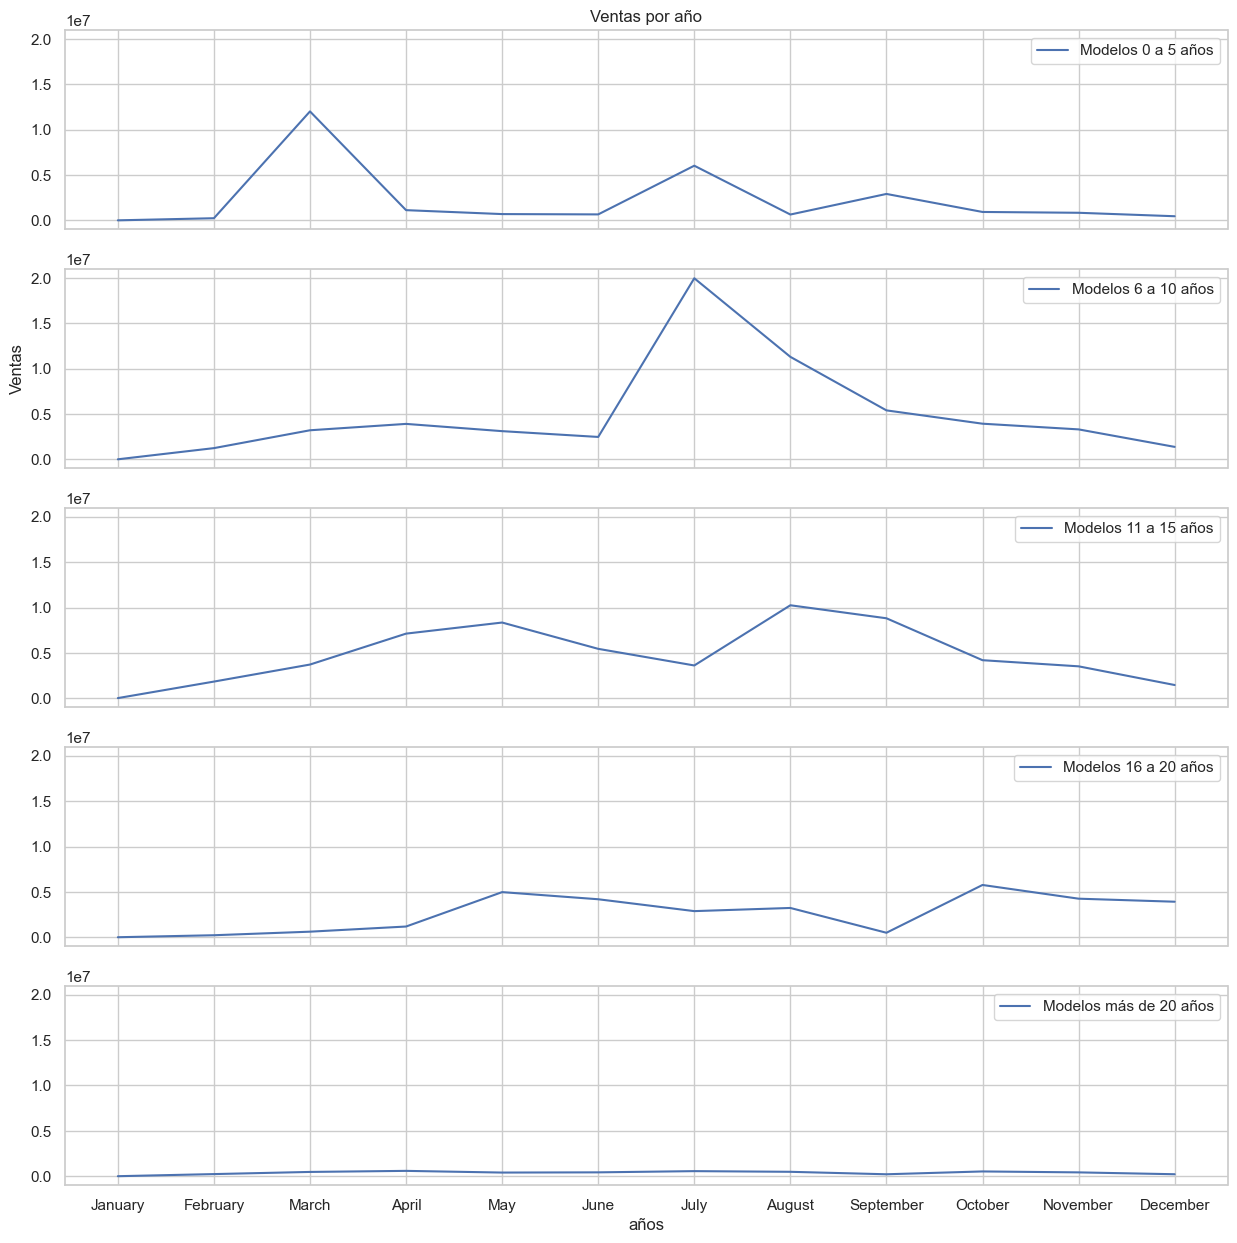

In [282]:

#figura subplot
fig,ax=plt.subplots(nrows=5,ncols=1,figsize=(15,15),sharex=True,sharey=True)

ax[0].plot(df_ysale_ycar.index,df_ysale_ycar['0 to 5'],label='Modelos 0 a 5 años')
ax[1].plot(df_ysale_ycar.index,df_ysale_ycar['6 to 10'],label='Modelos 6 a 10 años')
ax[2].plot(df_ysale_ycar.index,df_ysale_ycar['11 to 15'],label='Modelos 11 a 15 años')
ax[3].plot(df_ysale_ycar.index,df_ysale_ycar['16 to 20'],label='Modelos 16 a 20 años')
ax[4].plot(df_ysale_ycar.index,df_ysale_ycar[' > to 20'],label='Modelos más de 20 años')
#etiquetas
ax[0].set_title('Ventas por año')
ax[4].set_xlabel('años')
ax[1].set_ylabel('Ventas')
#leyendas
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
plt.show()

In [283]:
df_ranges=df_Carsales.filter(['Years_range','Price'],axis=1)
df_ranges=df_ranges.groupby(['Years_range'])['Price'].agg('sum').round(1).reset_index()
df_ranges=df_ranges.set_axis(['Years_range', 'Amount'], axis=1)
#df_ranges.T
df_ranges = df_ranges.sort_values('Amount', ascending=False)
df_ranges

Years_range    Amount
4     6 to 10  59137012
2    11 to 15  58360328
3    16 to 20  31697210
1      0 to 5  26487444
0     > to 20   4530687

In [284]:
fig = px.funnel(df_ranges, x='Amount', y='Years_range')
fig.show()



# INSIGHT

Los modelos con mayor venta son los que tienen una antigûedad entre 6 y 15 años

# Graficos con seaborn

In [285]:
!python --version #version python

Python 3.9.13


In [286]:
sns.__version__ #version seaborn

'0.11.2'

<AxesSubplot:title={'center':'Ingresos por venta de autos Anual'}, xlabel='Month_name', ylabel='Count'>

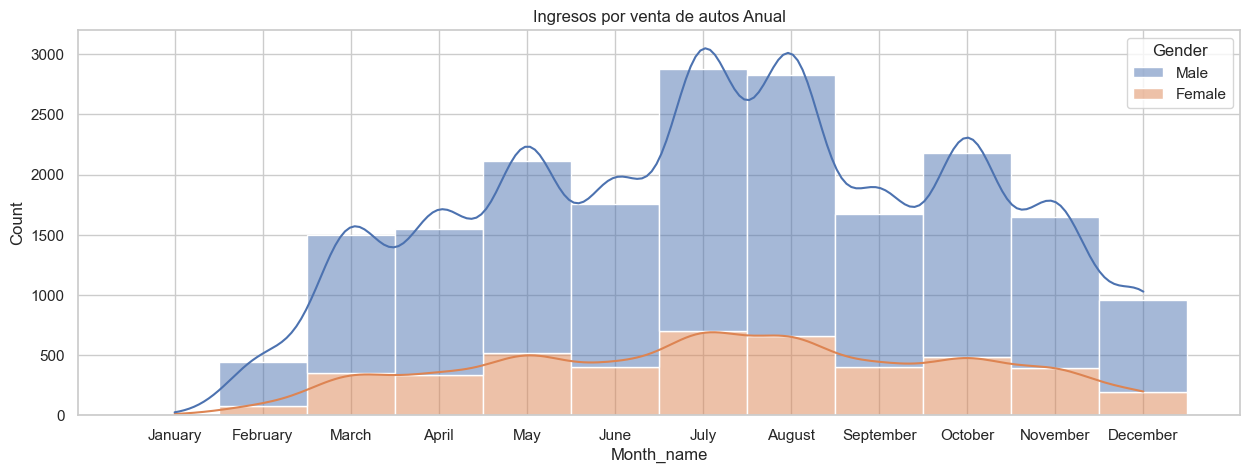

In [287]:
fig, ax = plt.subplots(figsize=(15,5))

ax.set_title("Ingresos por venta de autos Anual")
# set categorical order
df_Carsales['Month_name'] = pd.Categorical(df_Carsales['Month_name'],
                                   categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
                                   ordered=True)

sns.histplot(data=df_Carsales, x='Month_name', kde=True, hue="Gender",  multiple="stack")

In [288]:
#fig, ax = plt.subplots(figsize=(15,5))

#ax.set_title("Histograma de ventas de autos usados")

#df_Carsales['Years_range'] = pd.Categorical(df_Carsales['Years_range'],
#                                   categories=['0 to 5', '6 to 10', '11 to 15', '16 to 20','> to 20'],
#                                   ordered=True)

#sns.histplot(data=df_Carsales, x="Years_range", kde=True, hue="Gender",  multiple="stack")

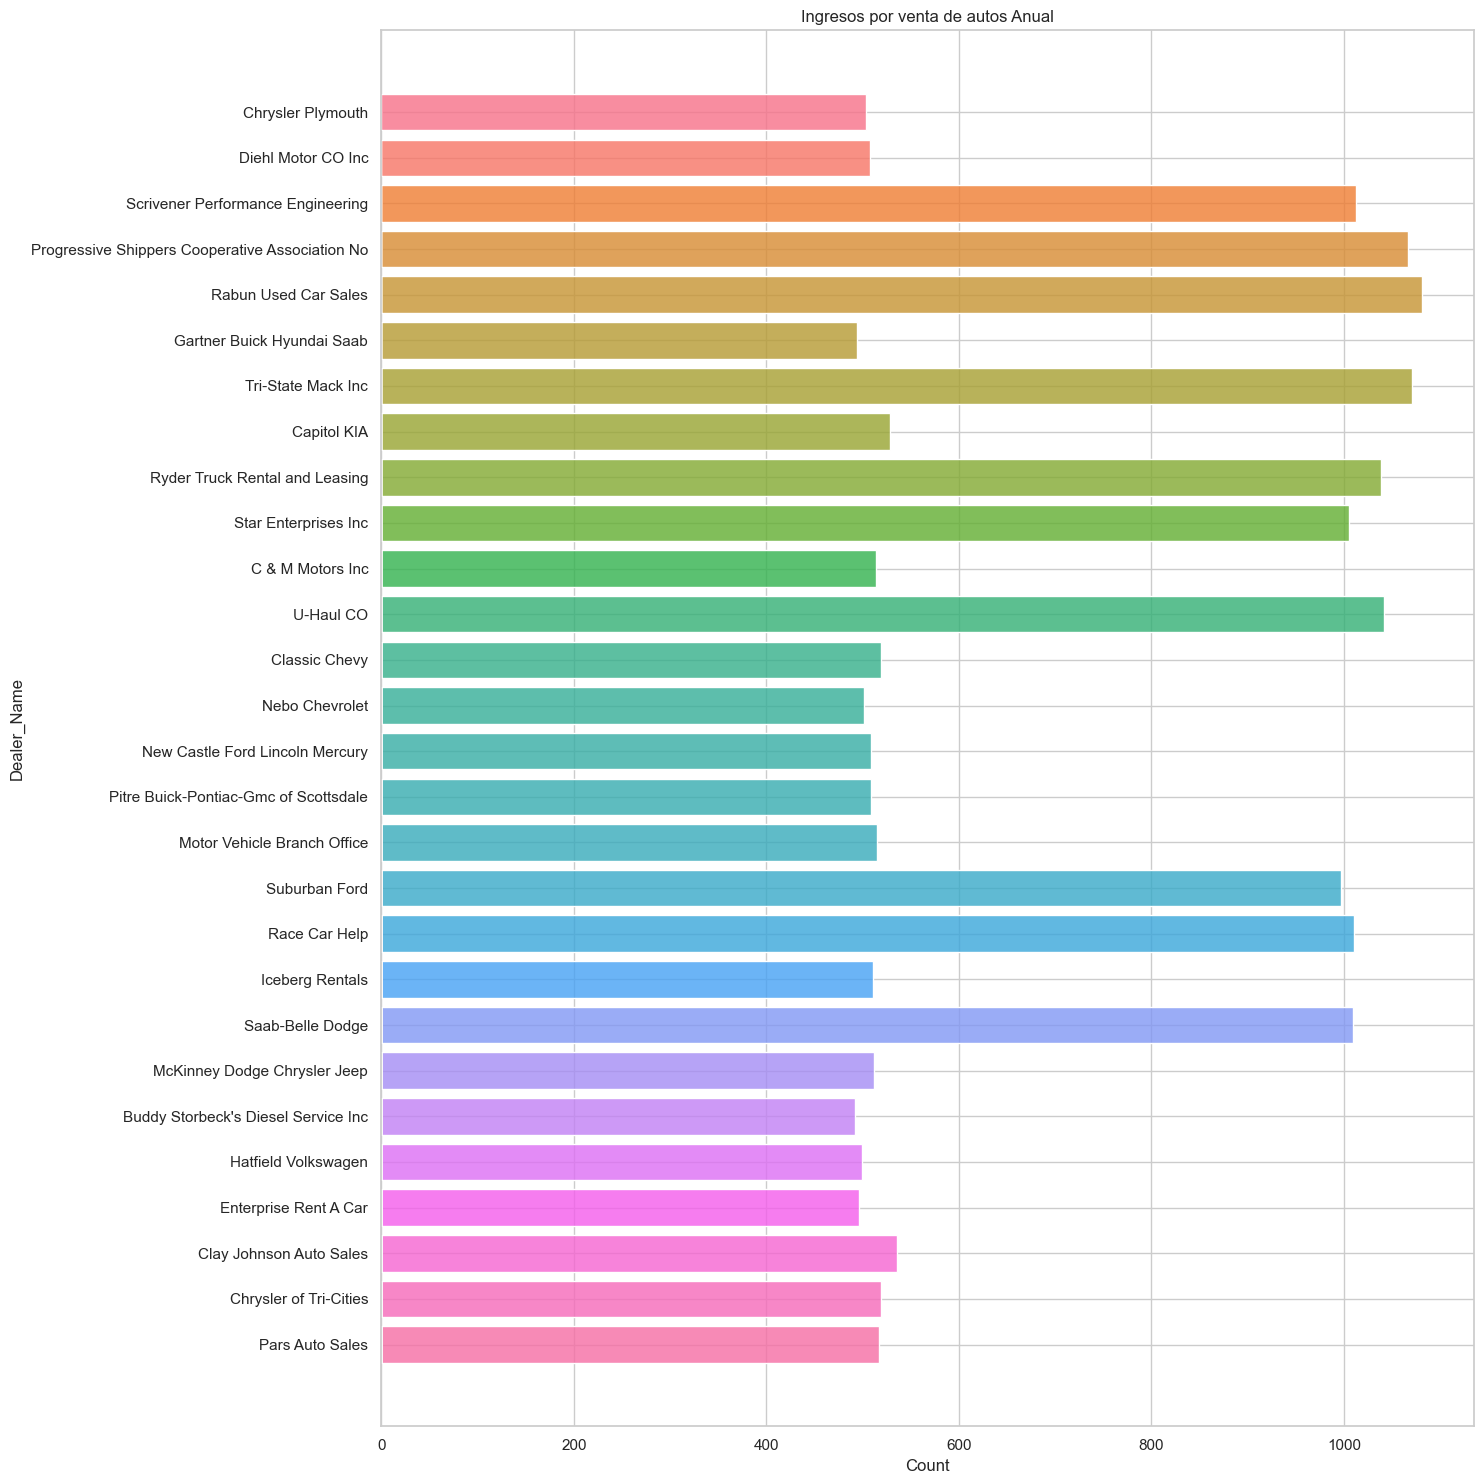

In [289]:
# Axis level

fig, ax = plt.subplots(figsize=(15,15))

ax.set_title("Ingresos por venta de autos Anual")

#ax.set_title("ventas por comerciante")


sns.histplot(data=df_Carsales, y="Dealer_Name", hue="Dealer_Name", shrink=.8, alpha=.8, legend=False)

fig.tight_layout()

Grafico que muestra las ventas segun vendedores por cada mes transcurrido, observamos 1ue las ventas se concentrar en 10 vendedores con mas de 1000 unidades vendidas en el año, el resto de los vendedores tiene un volumen de 500 a 600 unidades por añoGrafico que muestra las ventas segun vendedores

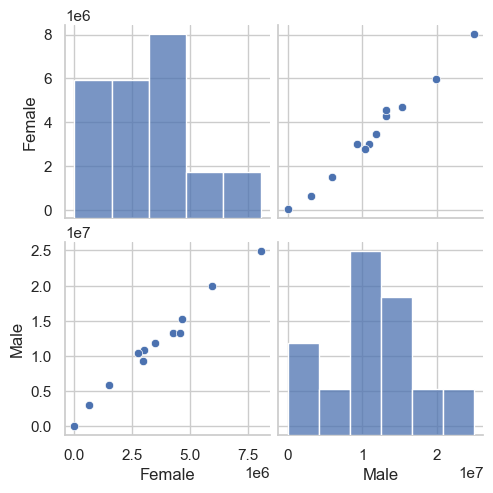

In [290]:
ax.bar(labels, men_means, width, label='Hombres')
ax.bar(labels, women_means, width,bottom=men_means,label='Mujeres')

ax.set_title("Ingresos por venta de autos Anual")

sns.pairplot(df_Gender)

Grafico que muestra por separado las ventas segun genero, mujeres vs hombres

# VISUALIZACIONES BIMODAL,BIVARIADO-TRIVARIADO

Descripción estadistica de los datos

In [291]:
df_Carsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19514 entries, 0 to 19513
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              19514 non-null  datetime64[ns]
 1   Customer Name     19514 non-null  object        
 2   Dealer_Name       19514 non-null  object        
 3   Company           19514 non-null  object        
 4   Model             19514 non-null  object        
 5   Year              19514 non-null  int64         
 6   Body Style        19514 non-null  object        
 7   Transmission      19514 non-null  object        
 8   Color             19514 non-null  object        
 9   Price             19514 non-null  int64         
 10  Mileage_km        19514 non-null  int64         
 11  Fuel              19514 non-null  object        
 12  engine_capacity   19506 non-null  float64       
 13  drivetrain        19514 non-null  object        
 14  Dealer_Add        1951

In [292]:

df_Carsales['Year'].astype(object)
df_Carsales['Months'].astype(object)
prices=df_Carsales['Price'].describe()
prices

count    19514.000000
mean      9235.045660
std       6665.185396
min        150.000000
25%       4800.000000
50%       7500.000000
75%      11500.000000
max      50000.000000
Name: Price, dtype: float64

In [293]:
mediana=df_Carsales['Price'].median()
mediana

7500.0

In [294]:
moda=df_Carsales['Price'].mode()
moda

0    5500
Name: Price, dtype: int64

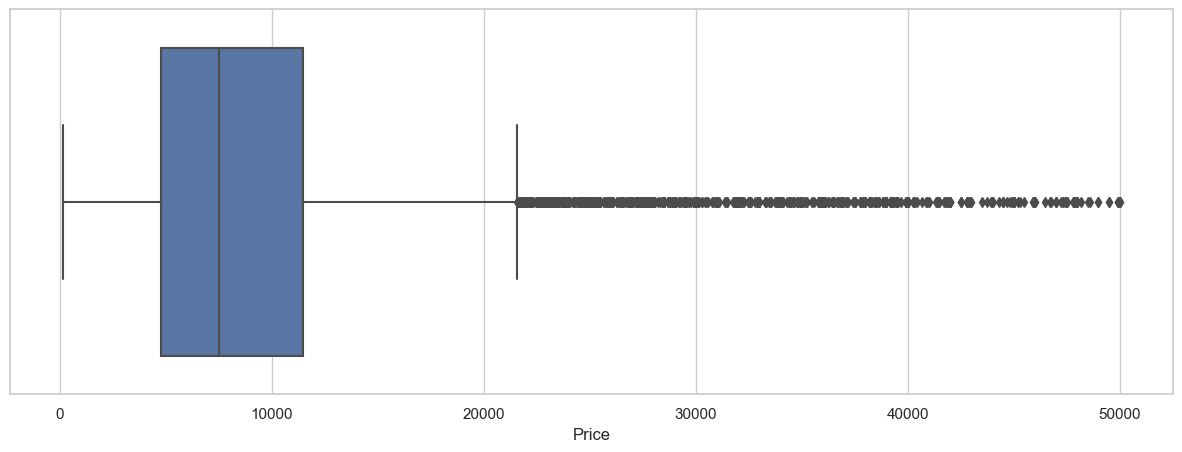

In [295]:
#ANALISIS DE PERCENTIL EN PRECIOS
sns.set_theme(rc={"figure.figsize":(15, 5)},style="whitegrid")
# Axis-level
ax = sns.boxplot(x=df_Carsales['Price'])

# INSIGHT

El precio de los autos oscila entre los 150 a 50,000 USD, el promedio es de 9,235 USD (mediana de 7,500 USD) lo que habla de 
un sesgo positivo por ser la mediana<media; el precio que mas se repite (moda) es de 9,235 USD lo que contrasta con una acumulación de los datos en el segundo percentil y con datos dispersos a revisar por arriba de los 22,000 USD


In [296]:
corr = df_Carsales.corr()

corr.style.background_gradient(cmap='coolwarm')

# INSIGHT

Aunque se observa una correlación fuerte entre el precio y la antigûedad del auto, ademas del kilometraje acumulado, adebemos
modificar el dataframe para codificar columnas como género, color, etc. asignándoles un valor numérico por categoría y analizar mas a fondo la correlación con otras caracteristicas del vehiculo


In [297]:
df_Carsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19514 entries, 0 to 19513
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              19514 non-null  datetime64[ns]
 1   Customer Name     19514 non-null  object        
 2   Dealer_Name       19514 non-null  object        
 3   Company           19514 non-null  object        
 4   Model             19514 non-null  object        
 5   Year              19514 non-null  int64         
 6   Body Style        19514 non-null  object        
 7   Transmission      19514 non-null  object        
 8   Color             19514 non-null  object        
 9   Price             19514 non-null  int64         
 10  Mileage_km        19514 non-null  int64         
 11  Fuel              19514 non-null  object        
 12  engine_capacity   19506 non-null  float64       
 13  drivetrain        19514 non-null  object        
 14  Dealer_Add        1951

CONVERTIMOS A CATEGORIAS ALGUNAS VARIABLES

In [298]:
#libreria para categorizar
df_Carsales["Company"] = df_Carsales["Company"].astype('category')
df_Carsales["Model"] = df_Carsales["Model"].astype('category')
df_Carsales["Years_old"] = df_Carsales["Years_old"].astype('category')
df_Carsales["Years_range"] = df_Carsales["Years_range"].astype('category')
df_Carsales["Body Style"] = df_Carsales["Body Style"].astype('category')
df_Carsales["Transmission"] = df_Carsales["Transmission"].astype('category')
df_Carsales["Color"] = df_Carsales["Color"].astype('category')
df_Carsales["Fuel"] = df_Carsales["Fuel"].astype('category')
df_Carsales["drivetrain"] = df_Carsales["drivetrain"].astype('category')
df_Carsales["Dealer_Add"] = df_Carsales["Dealer_Add"].astype('category')
df_Carsales["CouncilArea"] = df_Carsales["CouncilArea"].astype('category')
df_Carsales["Gender"] = df_Carsales["Gender"].astype('category')
df_Carsales["Dealer_Location"] = df_Carsales["Dealer_Location"].astype('category')
df_Carsales["Dealer_Region"] = df_Carsales["Dealer_Region"].astype('category')

#convertir categorias a valor numerico
df_Carsales["Company Category"]=df_Carsales["Company"].cat.codes
df_Carsales["Model Category"] = df_Carsales["Model"].cat.codes
df_Carsales["Year Old Category"] = df_Carsales["Years_old"].cat.codes
df_Carsales["Old Range Category"] = df_Carsales["Years_range"].cat.codes
df_Carsales["Body Style Category"] = df_Carsales["Body Style"].cat.codes
df_Carsales["Transmission Category"] = df_Carsales["Transmission"].cat.codes
df_Carsales["Color Category"] = df_Carsales["Color"].cat.codes
df_Carsales["Fuel Category"] = df_Carsales["Fuel"].cat.codes
df_Carsales["Drivetrain Category"] = df_Carsales["drivetrain"].cat.codes
df_Carsales["Dealer Add Category"] = df_Carsales["Dealer_Add"].cat.codes
df_Carsales["CouncilArea Category"] = df_Carsales["CouncilArea"].cat.codes
df_Carsales["Gender Category"] = df_Carsales["Gender"].cat.codes
df_Carsales["Dealer_Location Category"] = df_Carsales["Dealer_Location"].cat.codes
df_Carsales["Dealer_Region Category"] = df_Carsales["Dealer_Region"].cat.codes
df_Carsales.head(5)

Date Customer Name                                      Dealer_Name  \
0 2021-09-24         Micah                                Chrysler Plymouth   
1 2021-07-05         Josue                               Diehl Motor CO Inc   
2 2021-10-28       Shloime                Scrivener Performance Engineering   
3 2021-10-28        Julian  Progressive Shippers Cooperative Association No   
4 2021-10-28      Mohammed                             Rabun Used Car Sales   

  Company    Model  Year Body Style Transmission   Color  Price  ...  \
0   Acura      MDX  2000        suv    automatic  silver   5000  ...   
1   Acura  Integra  2000  hatchback   mechanical   white   6000  ...   
2   Acura       TL  2002      sedan    automatic   white   3850  ...   
3   Acura      MDX  2002        suv    automatic  silver   8999  ...   
4   Acura      MDX  2002        suv    automatic  silver   6500  ...   

   Body Style Category Transmission Category  Color Category Fuel Category  \
0                    9                     0               8             2   
1                    2                     1              10             3   
2                    8                     0              10             3   
3                    9                     0               8             3   
4                    9                     0               8             2   

  Drivetrain Category Dealer Add Category CouncilArea Category  \
0                   0                 690                    2   
1                   1                1613                   27   
2                   1                  78                   29   
3                   0                1531                    8   
4                   0                 427                   18   

  Gender Category  Dealer_Location Category Dealer_Region Category  
0               1                         4                      3  
1               1                         3                      4  
2               1                         0                      2  
3               1                         4                      3  
4               1                         5                      6  

[5 rows x 43 columns]

## ¿Qué factores son determinantes para definir el precio del auto?


In [299]:
corr = df_Carsales.corr()

corr.style.background_gradient(cmap='coolwarm')

# INSIGHT

 De lo anterior vemos que la mayor correlación con el precio del vehÍculo es el Modelo y el año del vehÍculo, es decir
 son los que en mayor medida influyen para determinar el precio y existen otras correlaciones como el tipo de vehículo,tren motriz,transmisión y  kilometraje


## ¿Cómo afecta el tipo de transmisión a la fijación del precio?

In [300]:
df_Carsales['Units']=1
df_Transmision=df_Carsales.filter(['Date','Transmission','Price','Units'],axis=1)
df_Transmision=df_Transmision.groupby(['Transmission','Price'])['Units'].agg('sum').round(1).reset_index()
df_Transmision['Total INCOME']=df_Transmision['Price']*df_Transmision['Units']
df_Transmision=df_Transmision[df_Transmision['Units']>0]
df_Transmision.head(2)

Transmission  Price  Units  Total INCOME
2     automatic    333      1           333
17    automatic    901      1           901

In [301]:
df_Carsales['Units']=1
df_Drivetrain=df_Carsales.filter(['Date','drivetrain','Price','Units'],axis=1)
df_Drivetrain=df_Drivetrain.groupby(['drivetrain','Price'])['Units'].agg('sum').round(1).reset_index()
df_Drivetrain['Total INCOME']=df_Drivetrain['Price']*df_Drivetrain['Units']
df_Drivetrain=df_Drivetrain[df_Drivetrain['Units']>0]
df_Drivetrain.head(2)

drivetrain  Price  Units  Total INCOME
36        all   1499      1          1499
53        all   1666      1          1666

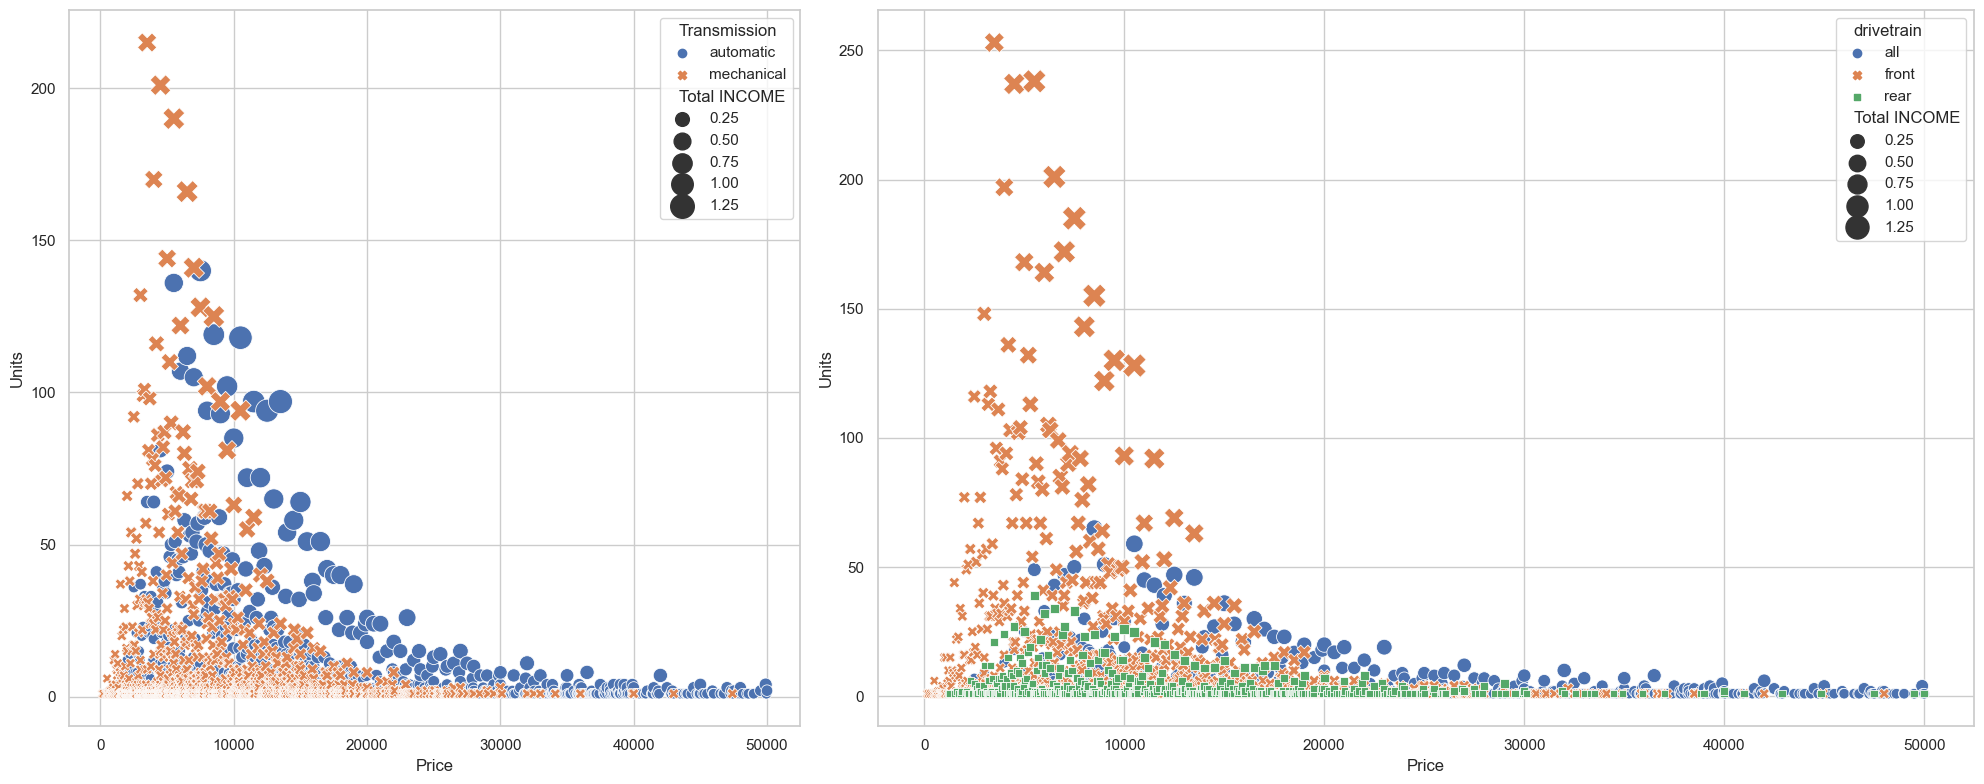

In [302]:
f, axs = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw=dict(width_ratios=[2, 3]))
sns.scatterplot(data=df_Transmision, x="Price", y="Units", hue="Transmission", size = 'Total INCOME',
               style = "Transmission",sizes = (50, 300), ax=axs[0])

sns.scatterplot(data=df_Drivetrain, x="Price", y="Units", hue='drivetrain', 
                 style = 'drivetrain',size = 'Total INCOME',sizes = (50, 300), ax=axs[1])
f.tight_layout()

# ¿Qué Transmisión representa mas ingresos para el vendedor?

In [303]:
df_Transmision_serie=df_Carsales.filter(['Date','Transmission','Price'],axis=1)
df_Transmision_serie=df_Transmision_serie.groupby(['Date','Transmission'])['Price'].agg('sum').round(1).reset_index()
df_Transmision_serie.head(2)

Date Transmission  Price
0 2021-01-28    automatic  18590
1 2021-01-28   mechanical      0

In [304]:
df_Drivetrain_serie=df_Carsales.filter(['Date','drivetrain','Price'],axis=1)
df_Drivetrain_serie=df_Drivetrain_serie.groupby(['Date','drivetrain'])['Price'].agg('sum').round(1).reset_index()
df_Drivetrain_serie.head(2)

Date drivetrain  Price
0 2021-01-28        all  18590
1 2021-01-28      front      0

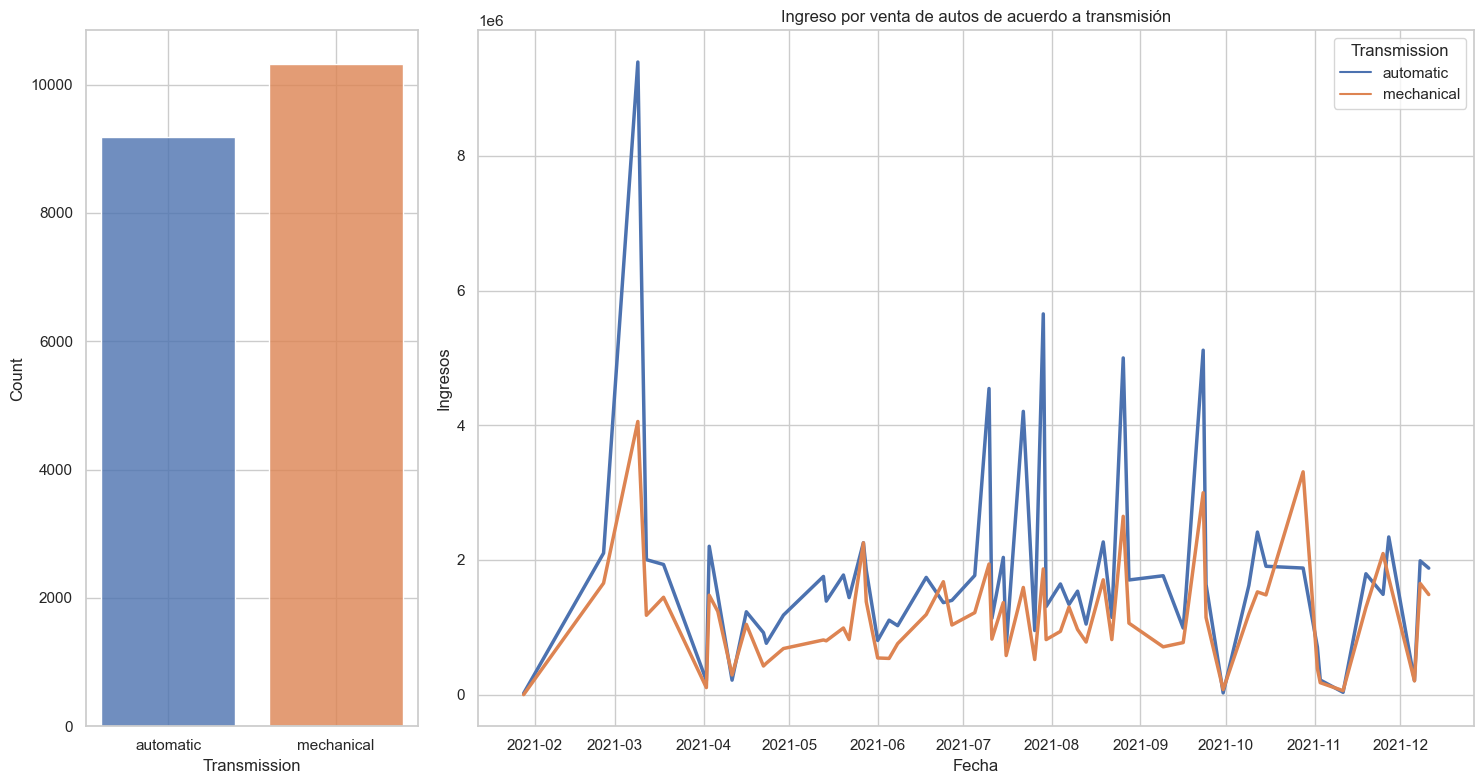

In [305]:
f, axs = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw=dict(width_ratios=[1, 3]))
sns.histplot(data=df_Carsales, x="Transmission", hue="Transmission", shrink=.8, alpha=.8, legend=False, ax=axs[0])
chart=sns.lineplot(data=df_Transmision_serie, x="Date", y="Price", hue="Transmission",linewidth=2.5, ax=axs[1])
chart.set(title='Ingreso por venta de autos de acuerdo a transmisión', ylabel='Ingresos', xlabel="Fecha")
f.tight_layout()

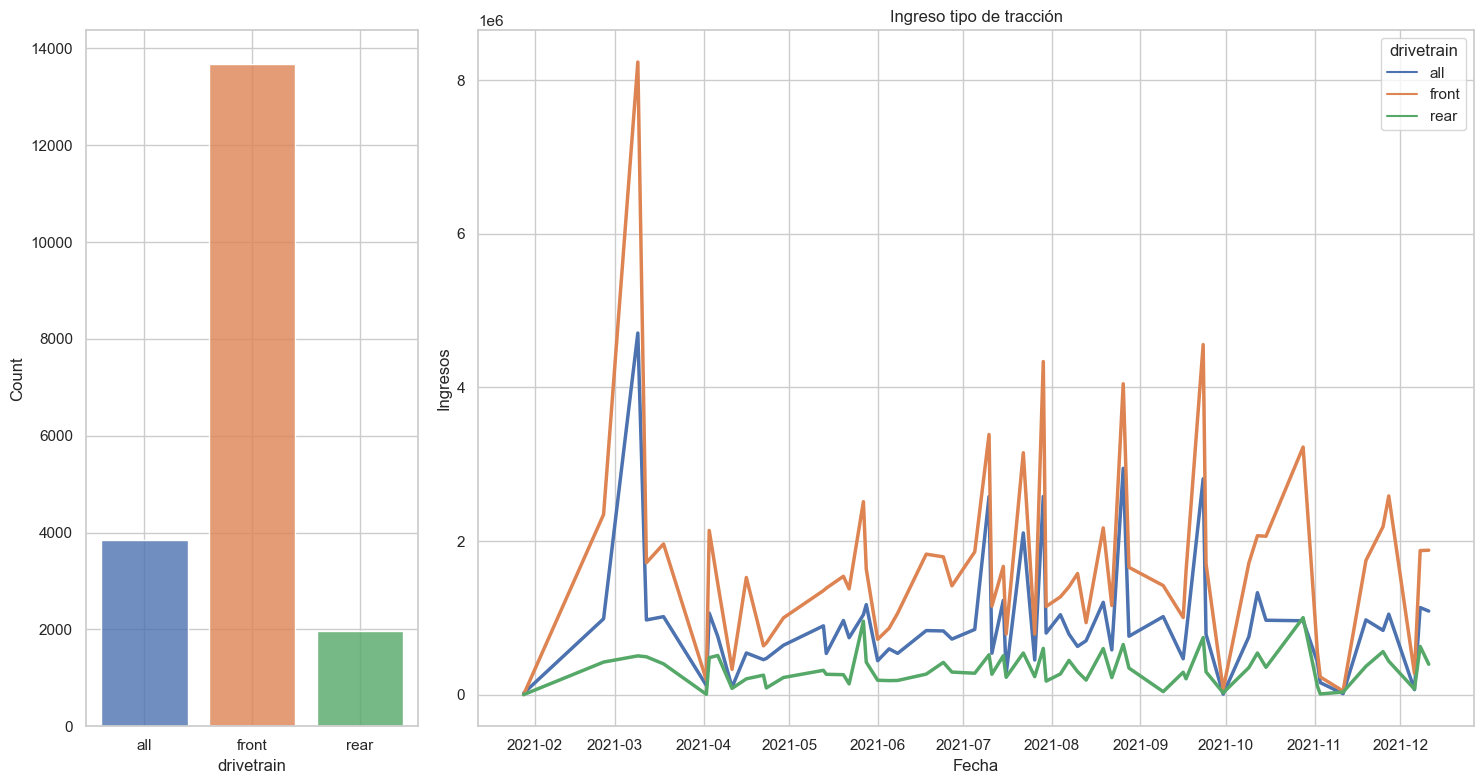

In [306]:
f, axs = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw=dict(width_ratios=[1, 3]))
sns.histplot(data=df_Carsales, x='drivetrain', hue='drivetrain', shrink=.8, alpha=.8, legend=False, ax=axs[0])
chart=sns.lineplot(data=df_Drivetrain_serie, x="Date", y="Price", hue='drivetrain',linewidth=2.5, ax=axs[1])
chart.set(title='Ingreso tipo de tracción', ylabel='Ingresos', xlabel="Fecha")
f.tight_layout()

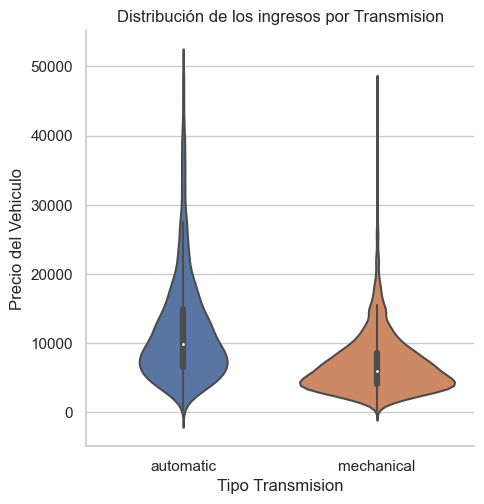

In [307]:
chart = sns.catplot(data=df_Carsales, kind='violin', x="Transmission", y='Price', split=True)
chart.set(xlabel='Tipo Transmision', ylabel='Precio del Vehiculo', title='Distribución de los ingresos por Transmision')
f.tight_layout()


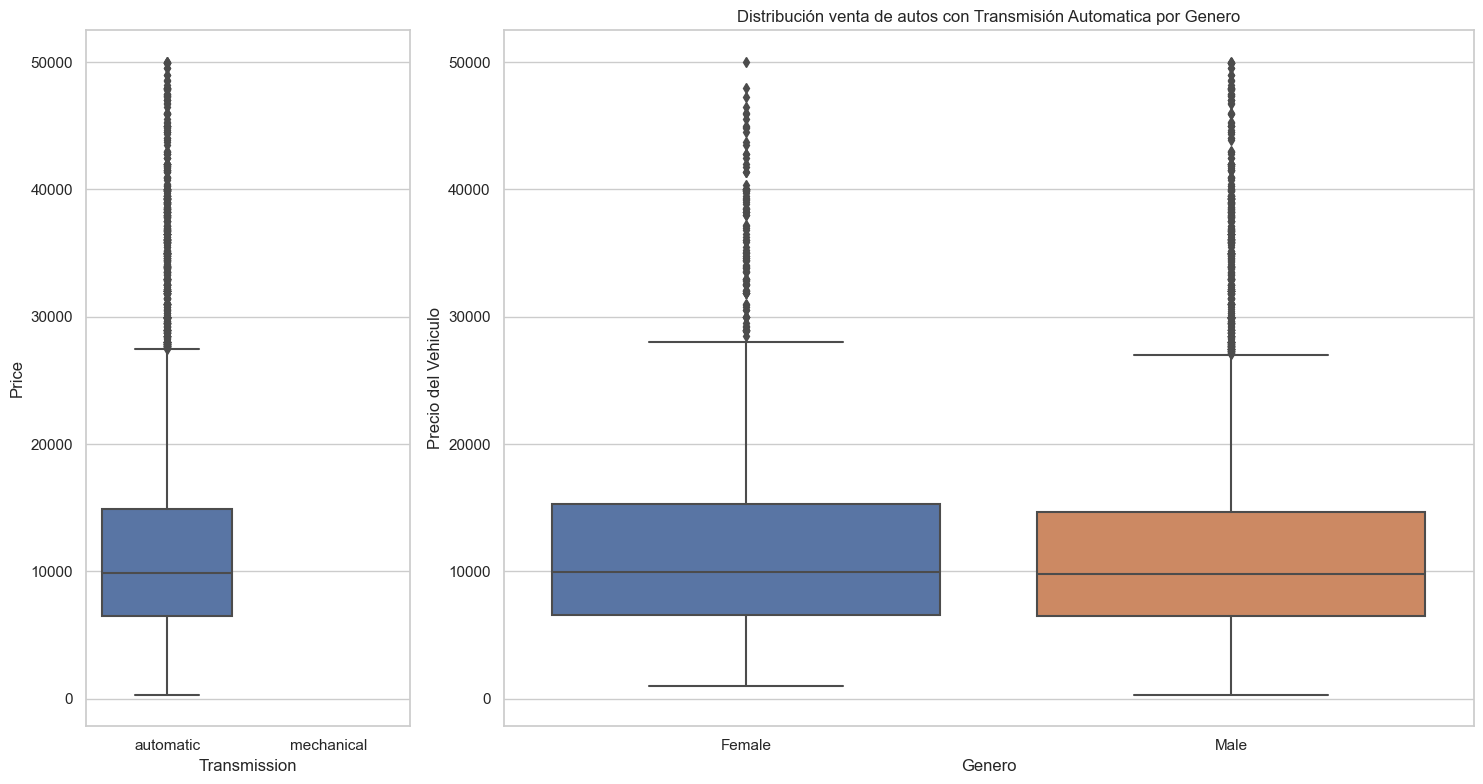

In [308]:
f, axs = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw=dict(width_ratios=[1, 3]))
sns.set_theme(style="whitegrid")
data=df_Carsales.filter(['Transmission','Gender','Price'],axis=1)
data_ta=data[data['Transmission']=='automatic']
ax1 = sns.boxplot(x="Transmission", y='Price', data=data_ta, ax=axs[0])
ax2 = sns.boxplot(x="Gender", y='Price', data=data_ta, ax=axs[1])
ax2.set(xlabel='Genero', ylabel='Precio del Vehiculo', title='Distribución venta de autos con Transmisión Automatica por Genero')
f.tight_layout()


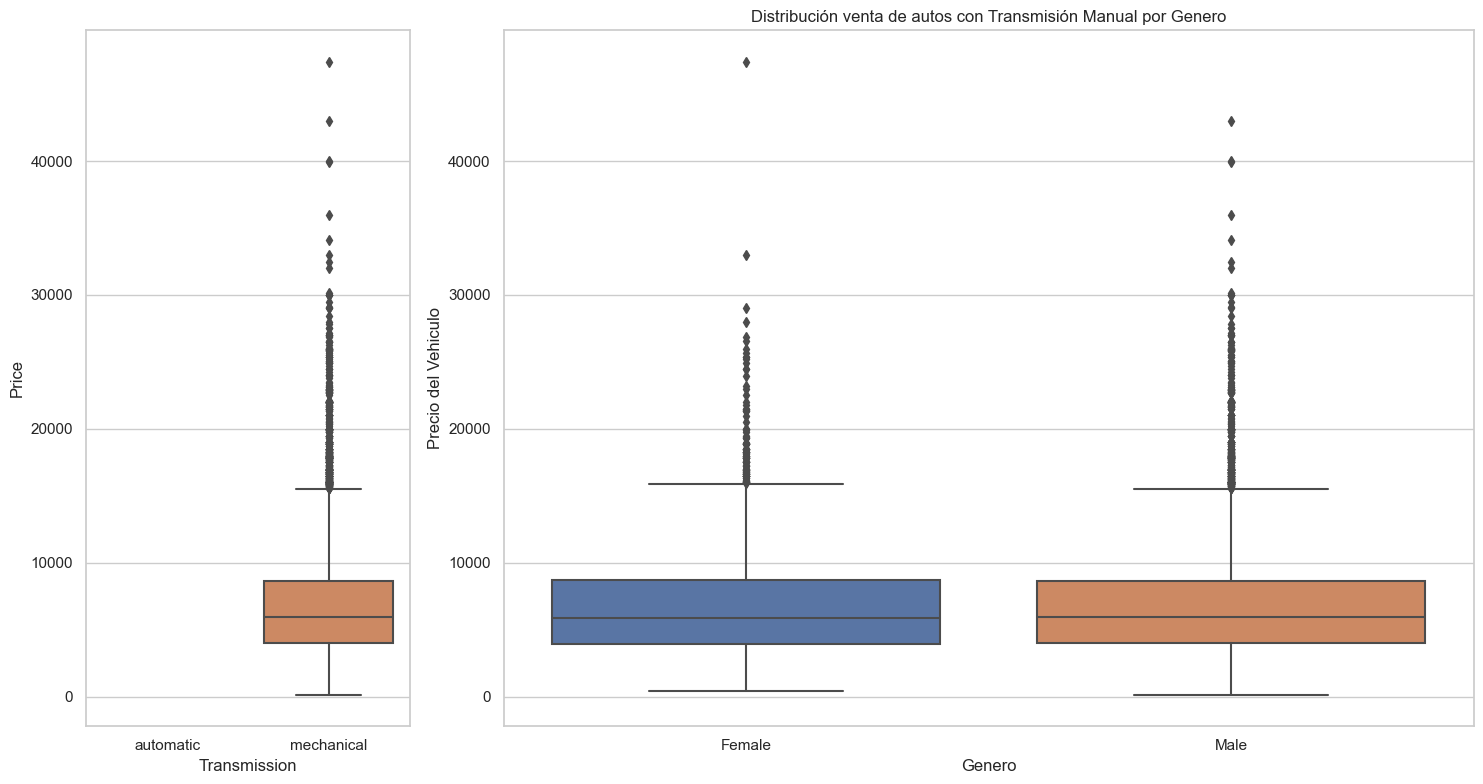

In [309]:
f, axs = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw=dict(width_ratios=[1, 3]))
sns.set_theme(style="whitegrid")
data=df_Carsales.filter(['Transmission','Gender','Price'],axis=1)
data_ma=data[data['Transmission']=='mechanical']
ax1 = sns.boxplot(x="Transmission", y='Price', data=data_ma, ax=axs[0])
ax2 = sns.boxplot(x="Gender", y='Price', data=data_ma, ax=axs[1])
ax2.set(xlabel='Genero', ylabel='Precio del Vehiculo', title='Distribución venta de autos con Transmisión Manual por Genero')
f.tight_layout()


In [310]:
Transmision_type=df_Carsales.filter(['Transmission','Price'],axis=1)
auto=Transmision_type[Transmision_type['Transmission']=='automatic']
TA_moda=auto['Price'].mode()
TA_mediana=auto['Price'].median()
TA_media=auto['Price'].mean()

Manual=Transmision_type[Transmision_type['Transmission']=='mechanical']
MA_moda=Manual['Price'].mode()
MA_mediana=Manual['Price'].median()
MA_media=Manual['Price'].mean()

print("Transmisión Automatica")
print(f"La moda en precio es:",int(TA_moda))
print(f"La mediana en precio  es:",int(TA_mediana))
print(f"La mediana en precio  es:",int(TA_media))
print(" ")
print("Transmisión Manual")
print(f"La moda en precio es:",int(MA_moda))
print(f"La mediana en precio es:",int(MA_mediana))
print(f"La mediana en precio  es:",int(MA_media))

Transmisión Automatica
La moda en precio es: 7500
La mediana en precio  es: 9850
La mediana en precio  es: 11870
 
Transmisión Manual
La moda en precio es: 3500
La mediana en precio es: 5928
La mediana en precio  es: 6890


# INSIGHT

Existe una tendencia de compra mayor hacia autos con transmisión Automatica y con tren motriz delantero,probablemente como medida hacia la electrificación. Para el caso de la TA el precio más frecuente es 7,500 USD y para la Manual 3,500


# ¿Cómo afecta el color a la fijación del precio?

In [311]:
df_Color=df_Carsales.filter(['Date','Color','Price','Units'],axis=1)
df_Color=df_Color.groupby(['Color','Price'])['Units'].agg('sum').round(1).reset_index()
df_Color['Total INCOME']=df_Color['Price']*df_Color['Units']
df_Color=df_Color[df_Color['Units']>0]
df_Color.head(2)

Color  Price  Units  Total INCOME
4  black    500      1           500
6  black    550      1           550

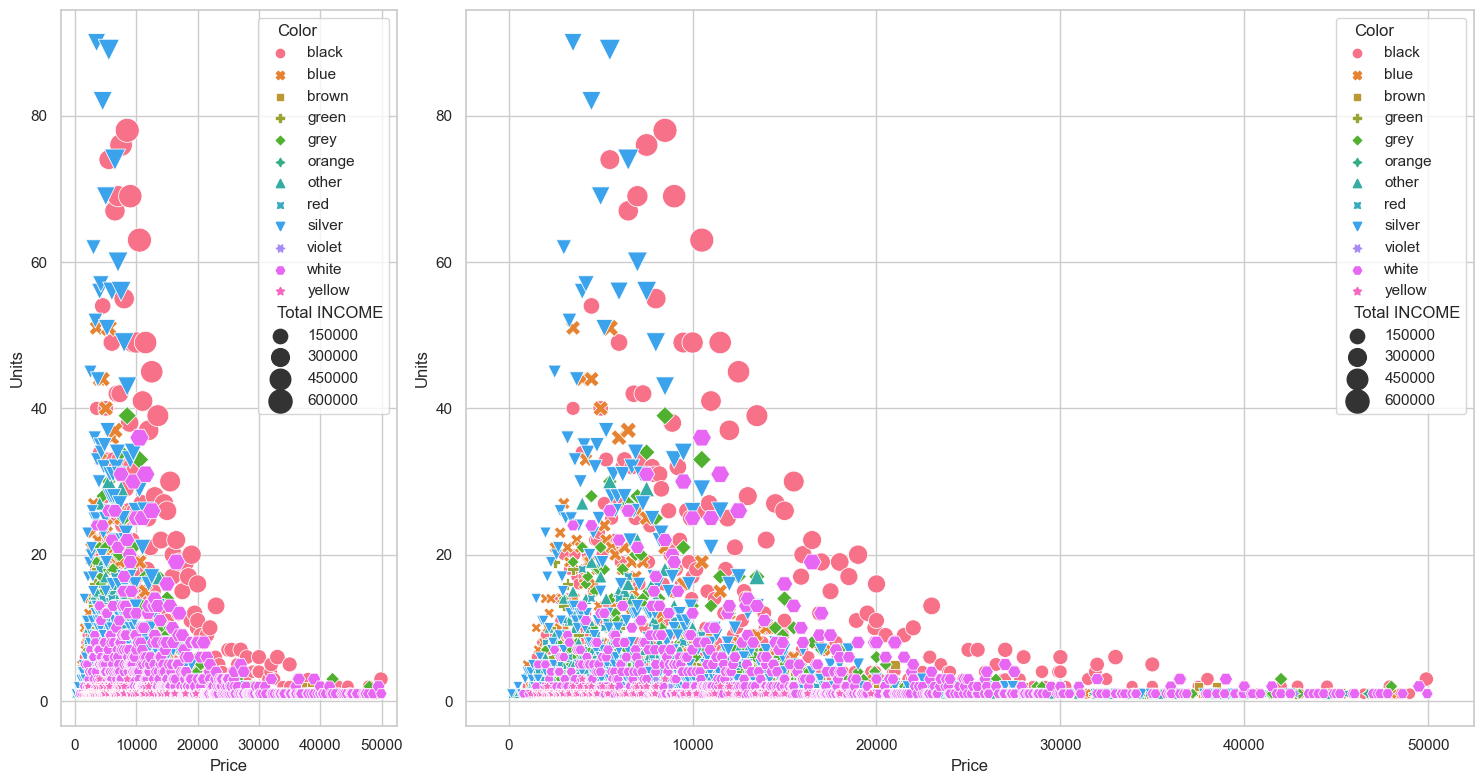

In [312]:
f, axs = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw=dict(width_ratios=[1, 3]))
sns.scatterplot(data=df_Color, x="Price", y="Units", hue="Color", size = 'Total INCOME',
                style = "Color",sizes = (50, 300), ax=axs[0])
sns.scatterplot(data=df_Color, x="Price", y="Units", hue="Color", 
                 style = "Color",size = 'Total INCOME',sizes = (50, 300), ax=axs[1])
f.tight_layout()

# ¿Qué color representa mas ingresos para el vendedor?

In [313]:
df_Color_serie=df_Carsales.filter(['Date','Color','Price'],axis=1)
df_Color_serie=df_Color_serie.groupby(['Date','Color'])['Price'].agg('sum').round(1).reset_index()
df_Color_serie.head(2)

Date  Color  Price
0 2021-01-28  black      0
1 2021-01-28   blue      0

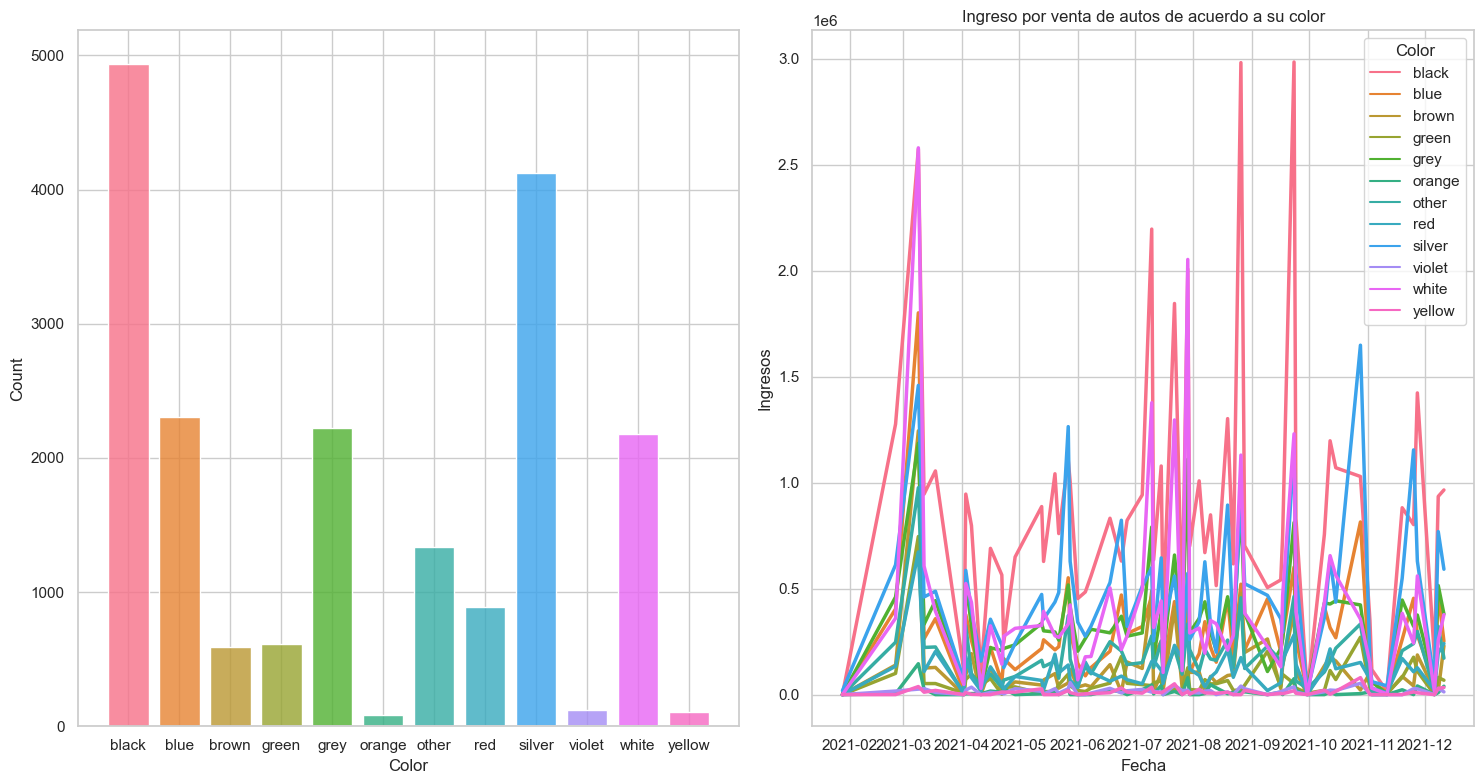

In [314]:
f, axs = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw=dict(width_ratios=[3, 3]))
sns.histplot(data=df_Carsales, x="Color", hue="Color", shrink=.8, alpha=.8, legend=False, ax=axs[0])
chart=sns.lineplot(data=df_Color_serie, x="Date", y="Price", hue="Color",linewidth=2.5, ax=axs[1])
chart.set(title='Ingreso por venta de autos de acuerdo a su color', ylabel='Ingresos', xlabel="Fecha")
f.tight_layout()

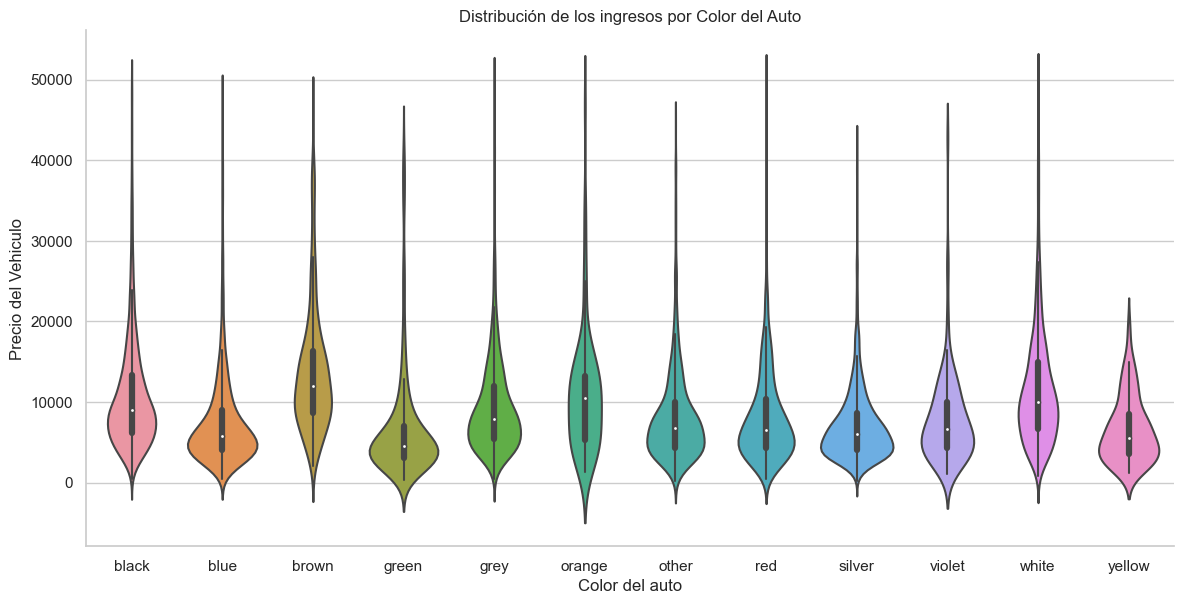

In [315]:

chart = sns.catplot(data=df_Carsales, kind='violin', x="Color", y='Price',split=True,height=6, aspect=2)
chart.set(xlabel='Color del auto', ylabel='Precio del Vehiculo', title='Distribución de los ingresos por Color del Auto')
f.tight_layout()

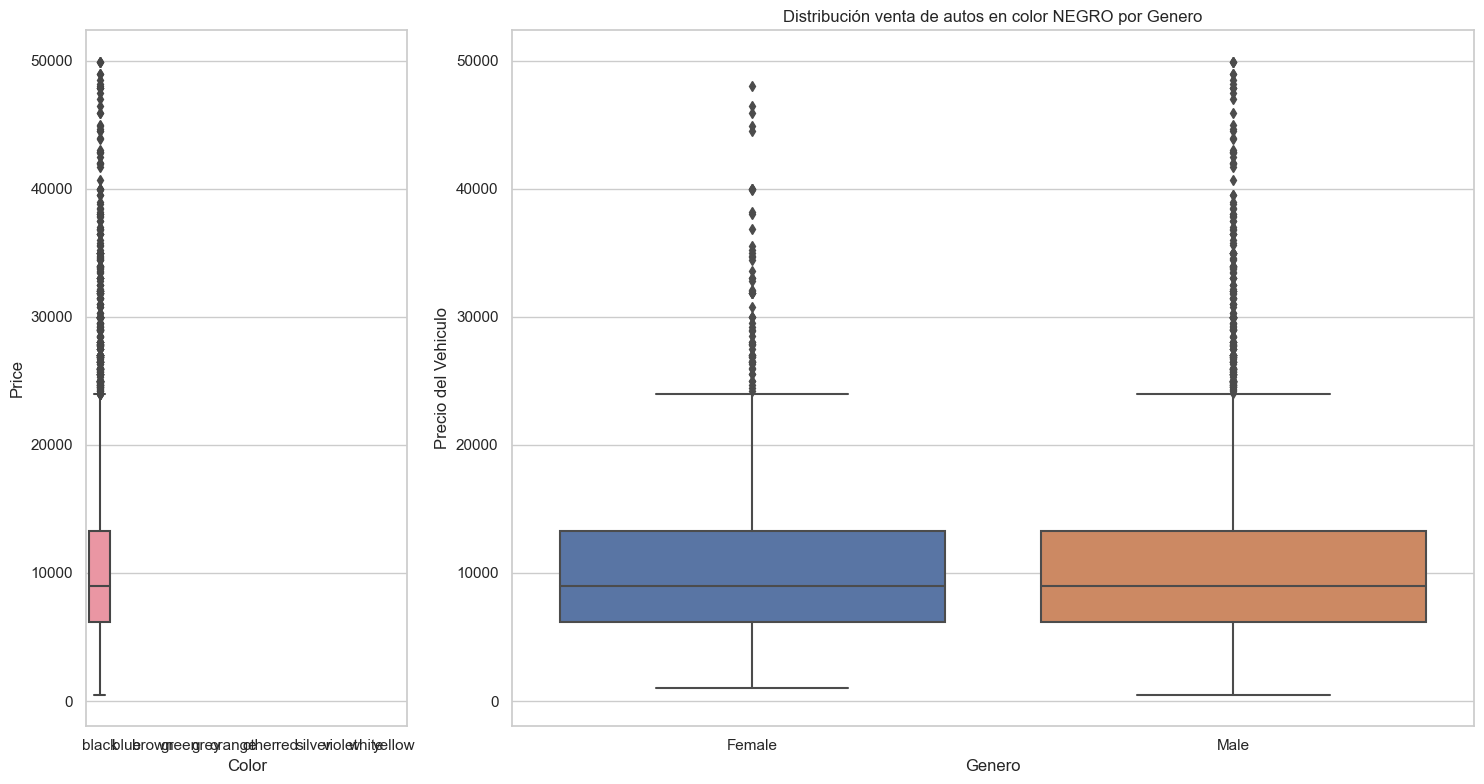

In [316]:
f, axs = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw=dict(width_ratios=[1, 3]))
sns.set_theme(style="whitegrid")
data=df_Carsales.filter(['Color','Gender','Price'],axis=1)
data_black=data[data['Color']=='black']
ax1 = sns.boxplot(x="Color", y='Price', data=data_black, ax=axs[0])
ax2 = sns.boxplot(x="Gender", y='Price', data=data_black, ax=axs[1])
ax2.set(xlabel='Genero', ylabel='Precio del Vehiculo', title='Distribución venta de autos en color NEGRO por Genero')
f.tight_layout()

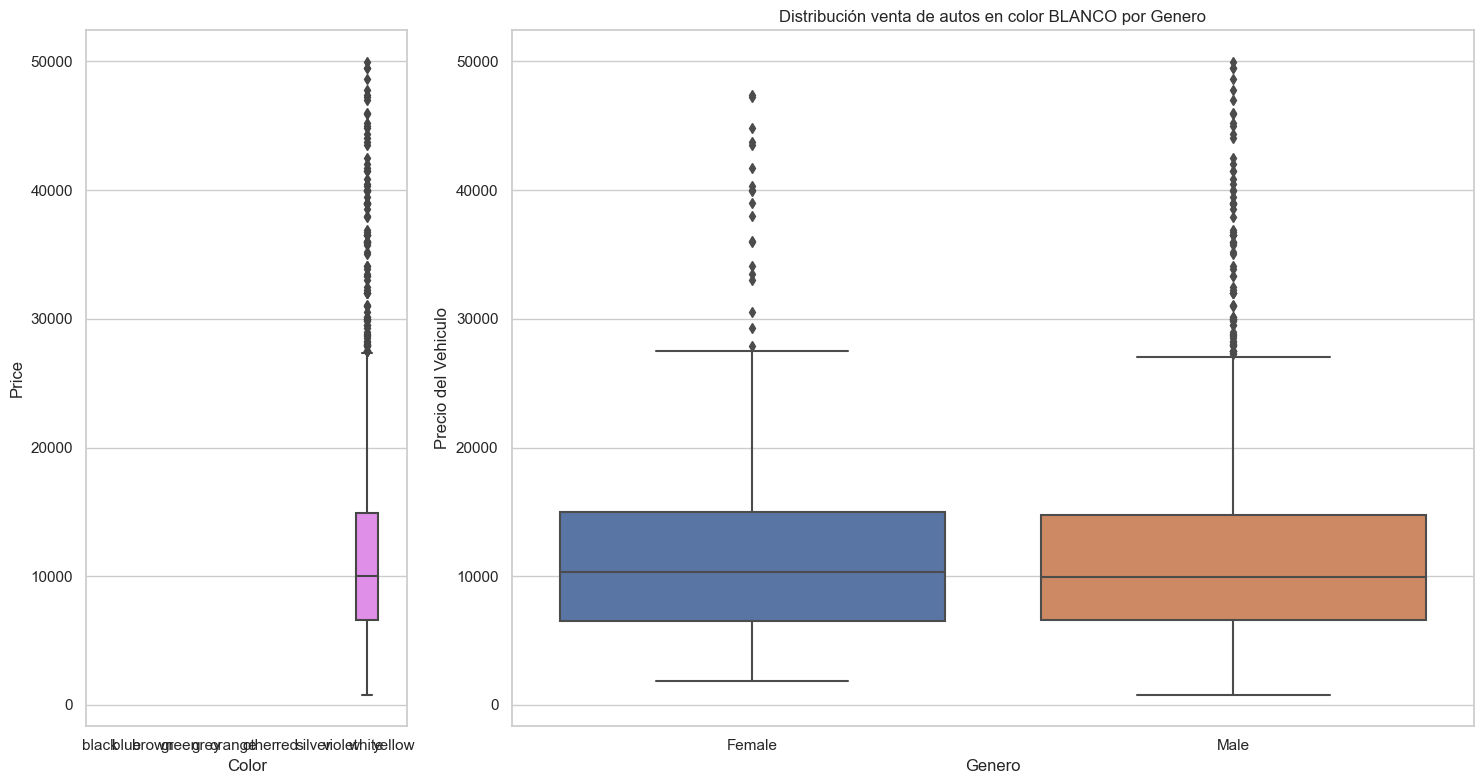

In [317]:
f, axs = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw=dict(width_ratios=[1, 3]))
sns.set_theme(style="whitegrid")
data=df_Carsales.filter(['Color','Gender','Price'],axis=1)
data_black=data[data['Color']=='white']
ax1 = sns.boxplot(x="Color", y='Price', data=data_black, ax=axs[0])
ax2 = sns.boxplot(x="Gender", y='Price', data=data_black, ax=axs[1])
ax2.set(xlabel='Genero', ylabel='Precio del Vehiculo', title='Distribución venta de autos en color BLANCO por Genero')
f.tight_layout()

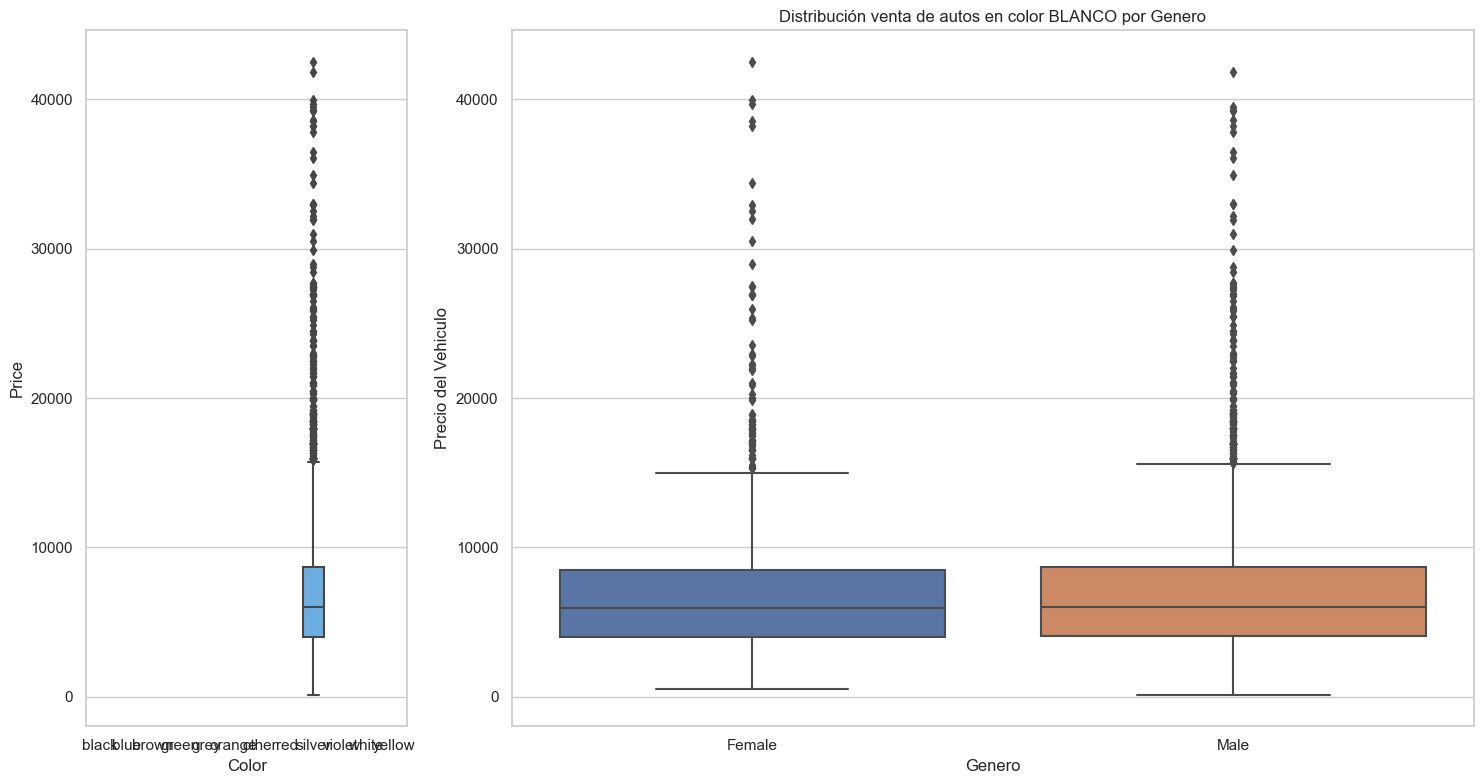

In [318]:
f, axs = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw=dict(width_ratios=[1, 3]))
sns.set_theme(style="whitegrid")
data=df_Carsales.filter(['Color','Gender','Price'],axis=1)
data_black=data[data['Color']=='silver']
ax1 = sns.boxplot(x="Color", y='Price', data=data_black, ax=axs[0])
ax2 = sns.boxplot(x="Gender", y='Price', data=data_black, ax=axs[1])
ax2.set(xlabel='Genero', ylabel='Precio del Vehiculo', title='Distribución venta de autos en color BLANCO por Genero')
f.tight_layout()

In [319]:
Color_type=df_Carsales.filter(['Color','Gender','Price'],axis=1)
Color_type=Color_type[Color_type['Color']=='black']

hombre=Color_type[Color_type['Gender']=='Male']
h_moda=hombre['Price'].mode()
h_mediana=hombre['Price'].median()
h_media=hombre['Price'].mean()
h_min=hombre['Price'].min()
h_max=hombre['Price'].max()

mujer=Color_type[Color_type['Gender']=='Female']
m_moda=mujer['Price'].mode()
m_mediana=mujer['Price'].median()
m_media=mujer['Price'].mean()
m_min=mujer['Price'].min()
m_max=mujer['Price'].max()

print("Color negro para Hombres")
print(f"La moda en precio es:",int(h_moda))
print(f"La mediana en precio  es:",int(h_mediana))
print(f"La media en precio  es:",int(h_media))
print(f"Precio Minimo:",h_min)
print(f"Precio Maximo:",int(h_max))

print(" ")
print("Color negro para Mujeres")
print(f"La moda en precio es:",int(m_media))
print(f"La mediana en precio es:",int(m_mediana))
print(f"La media en precio  es:",int(m_media))
print(f"Precio Minimo:",m_min)
print(f"Precio Maximo:",int(m_max))

Color negro para Hombres
La moda en precio es: 7500
La mediana en precio  es: 8999
La media en precio  es: 10800
Precio Minimo: 500
Precio Maximo: 49900
 
Color negro para Mujeres
La moda en precio es: 10793
La mediana en precio es: 8950
La media en precio  es: 10793
Precio Minimo: 1000
Precio Maximo: 47999


In [320]:
Color_type=df_Carsales.filter(['Color','Gender','Price'],axis=1)
Color_type=Color_type[Color_type['Color']=='white']

hombre=Color_type[Color_type['Gender']=='Male']
h_moda=hombre['Price'].mode()
h_mediana=hombre['Price'].median()
h_media=hombre['Price'].mean()
h_min=hombre['Price'].min()
h_max=hombre['Price'].max()

mujer=Color_type[Color_type['Gender']=='Female']
m_moda=mujer['Price'].mode()
m_mediana=mujer['Price'].median()
m_media=mujer['Price'].mean()
m_min=mujer['Price'].min()
m_max=mujer['Price'].max()

print("Color blanco para Hombres")
print(f"La moda en precio es:",int(h_moda))
print(f"La mediana en precio  es:",int(h_mediana))
print(f"La media en precio  es:",int(h_media))
print(f"Precio Minimo:",h_min)
print(f"Precio Maximo:",int(h_max))

print(" ")
print("Color blanco para Mujeres")
print(f"La moda en precio es:",int(m_moda))
print(f"La mediana en precio es:",int(m_mediana))
print(f"La media en precio  es:",int(m_media))
print(f"Precio Minimo:",m_min)
print(f"Precio Maximo:",int(m_max))

Color blanco para Hombres
La moda en precio es: 10500
La mediana en precio  es: 9954
La media en precio  es: 11714
Precio Minimo: 800
Precio Maximo: 49950
 
Color blanco para Mujeres
La moda en precio es: 11000
La mediana en precio es: 10300
La media en precio  es: 11893
Precio Minimo: 1896
Precio Maximo: 47400


In [321]:
Color_type=df_Carsales.filter(['Color','Gender','Price'],axis=1)
Color_type=Color_type[Color_type['Color']=='silver']

hombre=Color_type[Color_type['Gender']=='Male']
h_moda=hombre['Price'].mode()
h_mediana=hombre['Price'].median()
h_media=hombre['Price'].mean()
h_min=hombre['Price'].min()
h_max=hombre['Price'].max()

mujer=Color_type[Color_type['Gender']=='Female']
m_moda=mujer['Price'].mode()
m_mediana=mujer['Price'].median()
m_media=mujer['Price'].mean()
m_min=mujer['Price'].min()
m_max=mujer['Price'].max()

print("Color plata para Hombres")
print(f"La moda en precio es:",int(h_moda))
print(f"La mediana en precio  es:",int(h_mediana))
print(f"La media en precio  es:",int(h_media))
print(f"Precio Minimo:",h_min)
print(f"Precio Maximo:",int(h_max))

print(" ")
print("Color plata para Mujeres")
print(f"La moda en precio es:",int(m_moda))
print(f"La mediana en precio es:",int(m_mediana))
print(f"La media en precio  es:",int(m_media))
print(f"Precio Minimo:",m_min)
print(f"Precio Maximo:",int(m_max))

Color plata para Hombres
La moda en precio es: 4500
La mediana en precio  es: 6000
La media en precio  es: 7119
Precio Minimo: 150
Precio Maximo: 41850
 
Color plata para Mujeres
La moda en precio es: 3500
La mediana en precio es: 5950
La media en precio  es: 7222
Precio Minimo: 500
Precio Maximo: 42500


# INSIGHT

Existe una mayor sensibilidad hacia los colores, negro, plata y blanco,  siendo los precios mas frecuentes para negro 7,500 USd para hombres y 10,754 para mujeres; para el color blanco  0,500 usd hombres y 11,000 usd mujeres, para silver 4,500 usd hombres y 3,500 mujeres


## ¿Cómo afecta la marca y tipo de vehículo a la determinación del precio?

In [322]:
df_Marca=df_Carsales.filter(['Date','Company','Price','Units'],axis=1)
df_Marca=df_Marca.groupby(['Company','Price'])['Units'].agg('sum').round(1).reset_index()
df_Marca=df_Marca[df_Marca['Units']>0]
df_Marca['Total INCOME']=df_Marca['Price']*df_Marca['Units']
df_Marca.head(2)

Company  Price  Units  Total INCOME
258   Acura   3850      1          3850
376   Acura   5000      1          5000

In [323]:

fig = px.scatter(df_Marca, x="Price", y="Units", color="Company", symbol="Company",size='Total INCOME')
fig.show()

In [324]:
df_Style=df_Carsales.filter(['Date','Body Style','Price','Units'],axis=1)
df_Style=df_Style.groupby(['Body Style','Price'])['Units'].agg('sum').round(1).reset_index()
df_Style=df_Style[df_Style['Units']>0]
df_Style['Total INCOME']=df_Style['Price']*df_Style['Units']
#df_Style.head(2)
fig = px.scatter(df_Style, x="Price", y="Units", color='Body Style', symbol='Body Style',size='Total INCOME')
fig.show()


## ¿Qué marca y tipo de vehículo representa mas ingresos para el vendedor?

In [325]:

fig = px.bar(df_Marca, x='Company', y='Total INCOME',
             hover_data=["Price", 'Units'], color='Total INCOME',
             labels={'pop':'Volumen de ventas en USD'}, height=400)
fig.show()

In [326]:

fig = px.bar(df_Style, x='Body Style', y='Total INCOME',
             hover_data=["Price", 'Units'], color='Total INCOME',
             labels={'pop':'Volumen de ventas en USD'}, height=400)
fig.show()

# INSIGHT


Las marcas con mejor ingreso son: Vw, Mercedes, BMW y Audí  en cuanto al tipo de auto SUV y Sedan ; principalmente en precios que no pasan de los 10,000 usd
Se hace un anÁlisis de BOX para esos segmentos


In [327]:

fig = px.box(df_Marca, x="Company", y="Price", points="all")
fig.show()

In [328]:
marca=['Mercedes-Benz','Volkswagen','BMW','Audi']
df_Marca2=df_Marca[df_Marca['Company'].isin(marca)]
#df_Marca2
fig = px.box(df_Marca2, x="Company", y="Price", points="all")
fig.show()

In [329]:

fig = px.box(df_Style, x="Body Style", y="Price", points="all")
fig.show()

# INSIGHT

Lo que se observa es que en rangos que van de los 10 a los 26 dólares,  hay una mayor concentración de ventas.
sumado al análisis de correlación anterior en donde se determino lo siguiente:
--- De lo anterior vemos que la mayor correlación con el precio del vehículo es el año del vehículo,kilometraje y tipo de transmisión, es decir, son los que en mayor medida influyen para determinar el precio---
 Haciendo un zoom a la información podemos sumar a la demanda de vehículos por preferencia de marca y tipo:Vw, Mercedes, BMW y Audí y en SUV y Sedan


# VARIABLES A UTILIZAR

 ##############################################################################################################################
    Para poder realizar una regresión en el precio las variables a utilizar de acuerdo a su correlación s:
        
        
        Mileage_km: Kilometraje  -0.433368
        engine_capacity: capacidad del motor  0.274543
        Years Old: Antigûedad del vehiculo 0.671517   
        Transmission: Tipo de transmisión -0.372982
        Drivetrain: Tren Motriz -0.273213   
            
        Se realizará una regresión lineal simple siendo el objetivo el precio 
        
        Lo que se espera es:
          identificar el precio optimo para los modelos actualmente en venta para los siguientes años, ademas de identificar
          la tendencia en modelos o tipos de auto más convenientes para mejorar el ingreso y dejar de lado el inventario que
          significa poco ingreso (compra-venta).
            
            
        
  ##############################################################################################################################           
            

In [330]:
df_Carsales_b=df_Carsales[['Price', 'Mileage_km', 'engine_capacity','Year Old Category','Transmission Category','Drivetrain Category']]
corr = df_Carsales_b.corr()
corr.style.background_gradient(cmap='coolwarm')


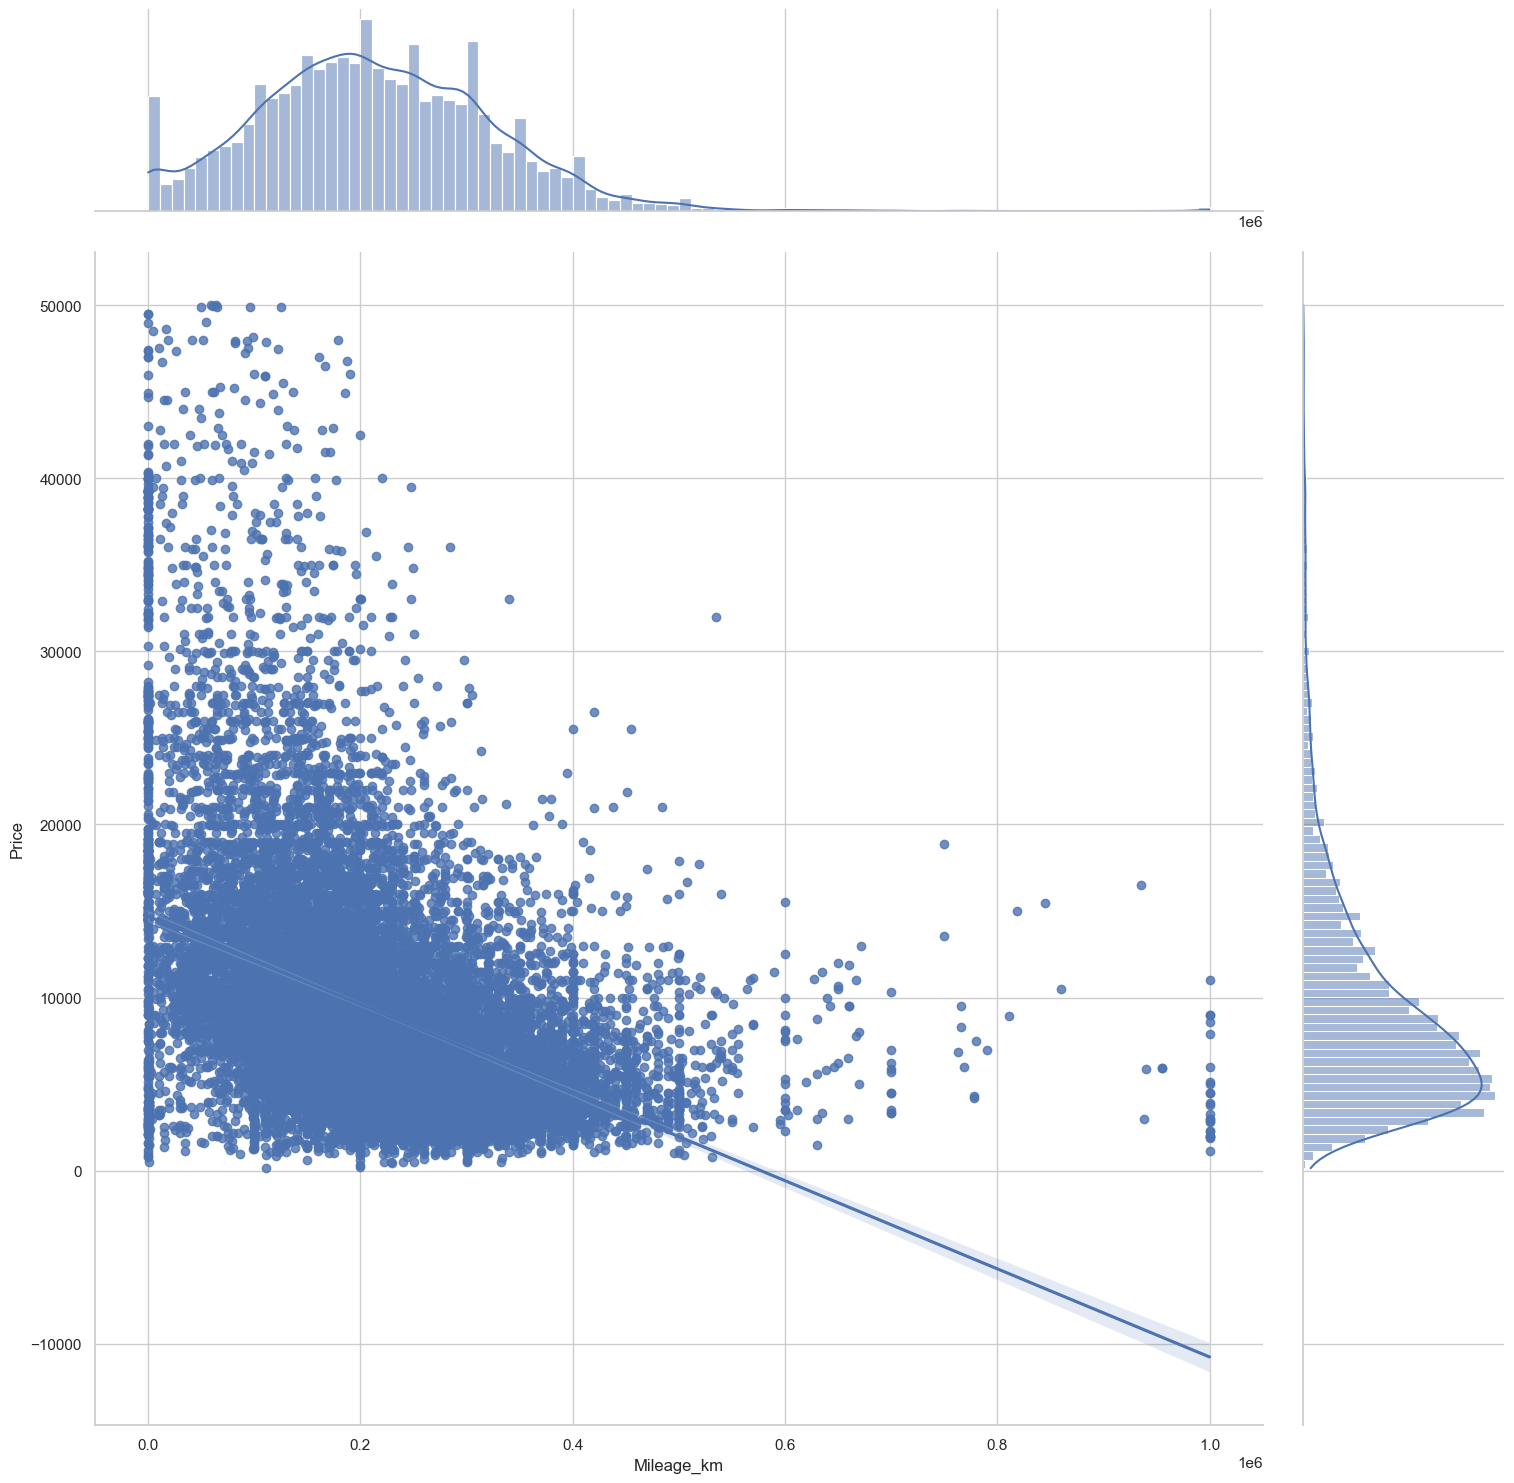

In [331]:
sns.jointplot(x='Mileage_km',y='Price',data=df_Carsales_b,kind='reg',height=15, ratio=5)


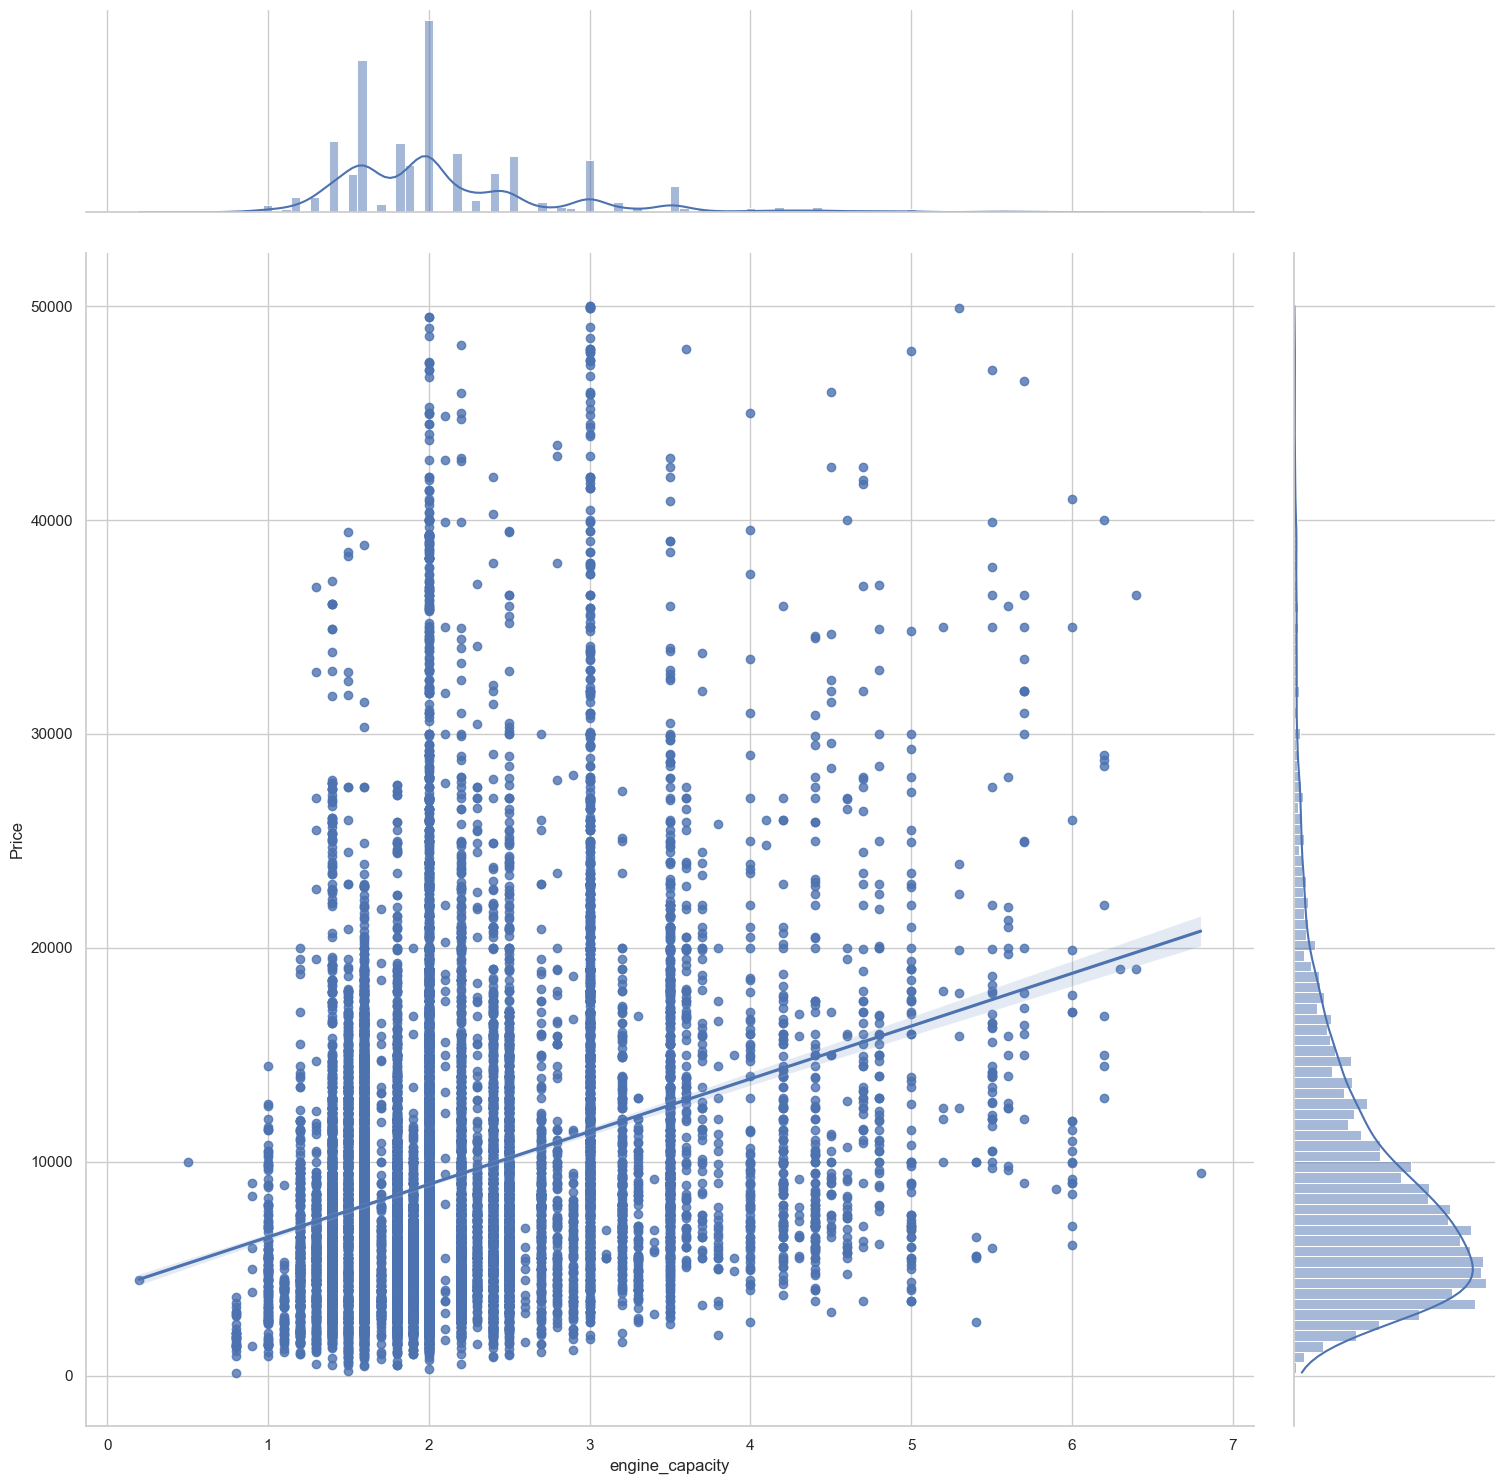

In [332]:
sns.jointplot(x='engine_capacity',y='Price',data=df_Carsales,kind='reg',height=15, ratio=5)

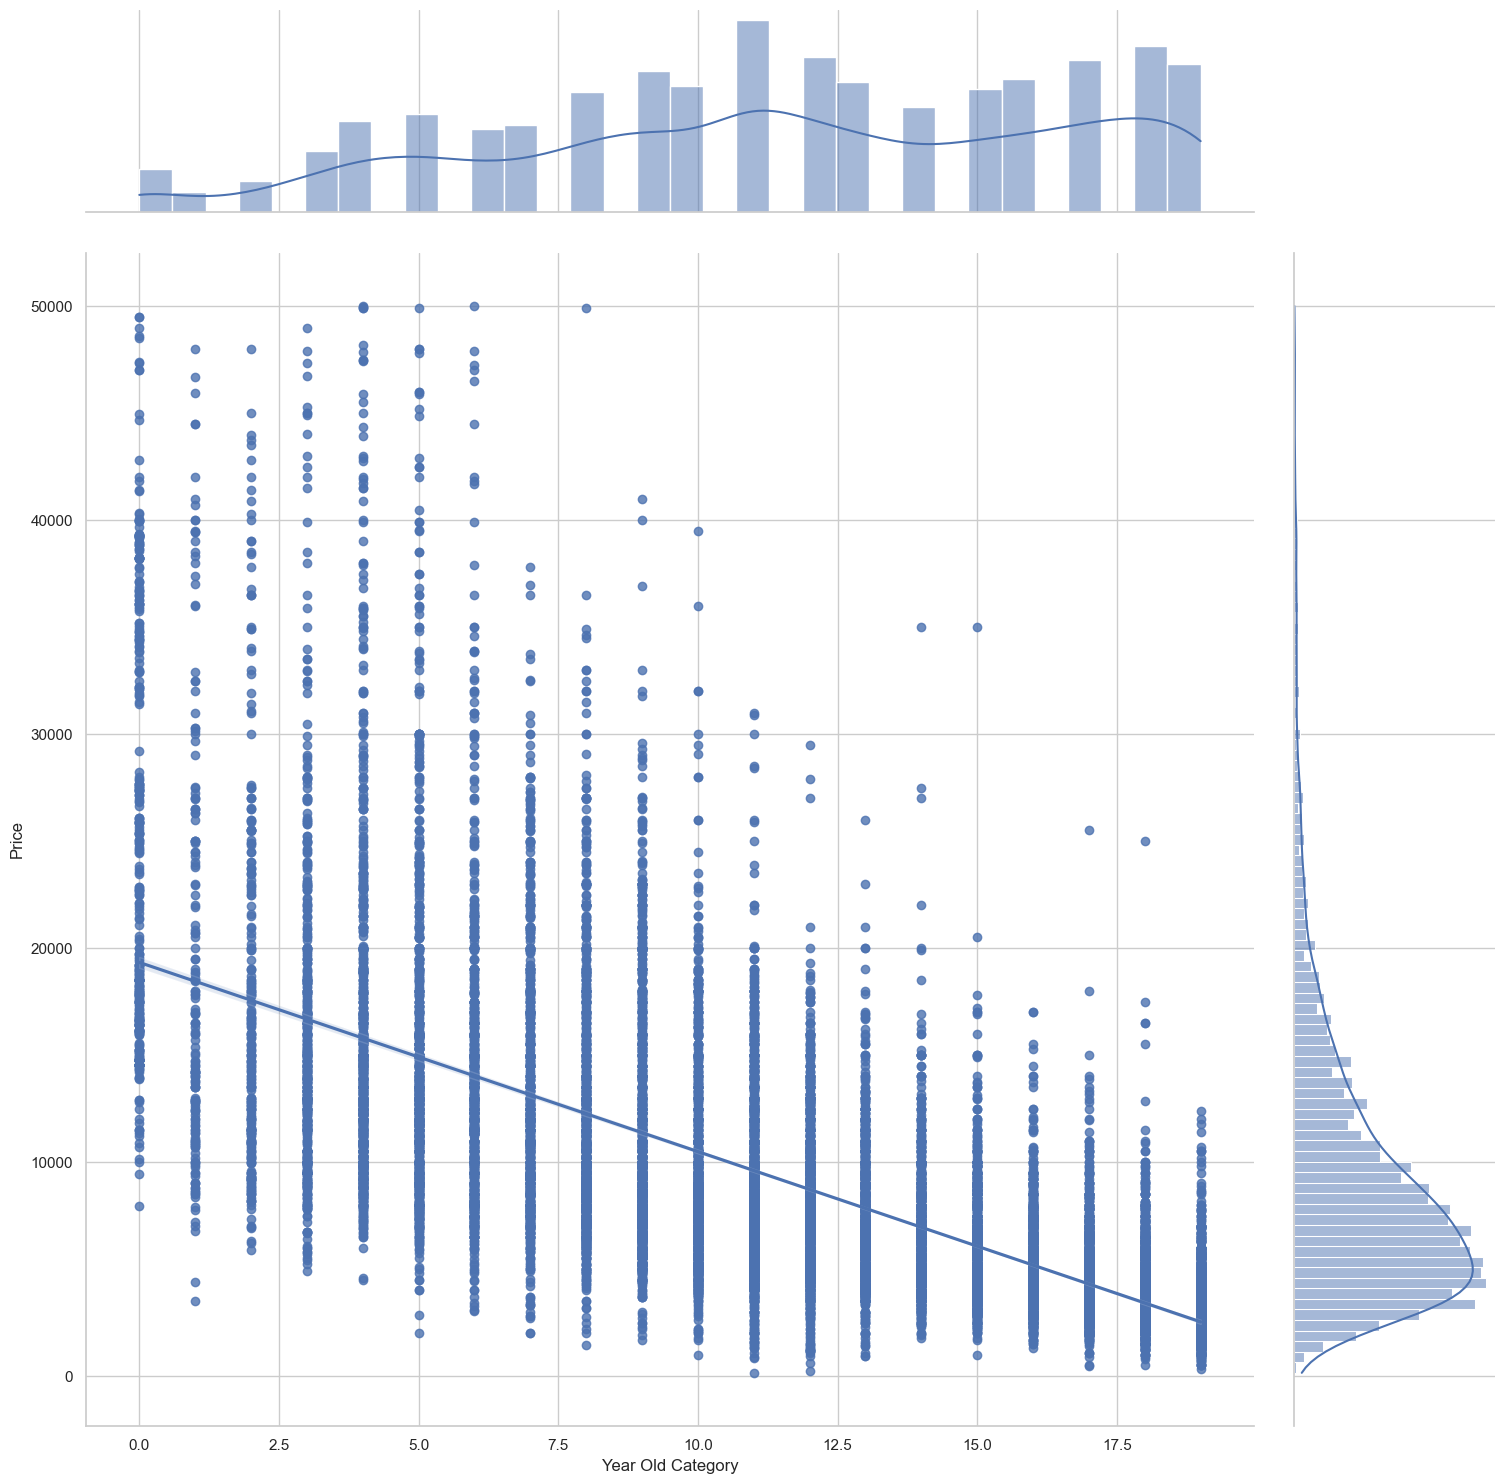

In [333]:
mask=df_Carsales[['Year Old Category','Years_old','Price']]
sns.jointplot(x='Year Old Category',y='Price',data=mask,kind='reg',height=15, ratio=5)

In [334]:
mask=df_Carsales[['Years_old','Year Old Category']]
mask = mask.drop_duplicates(subset=['Years_old','Year Old Category'])
mask =mask.sort_values(by='Year Old Category')
mask


Years_old  Year Old Category
1181         2                  0
1179         3                  1
1175         4                  2
1163         5                  3
1141         6                  4
43           7                  5
42           8                  6
40           9                  7
36          10                  8
30          11                  9
29          12                 10
27          13                 11
22          14                 12
18          15                 13
14          16                 14
8           17                 15
6           18                 16
2           19                 17
66          20                 18
0           21                 19

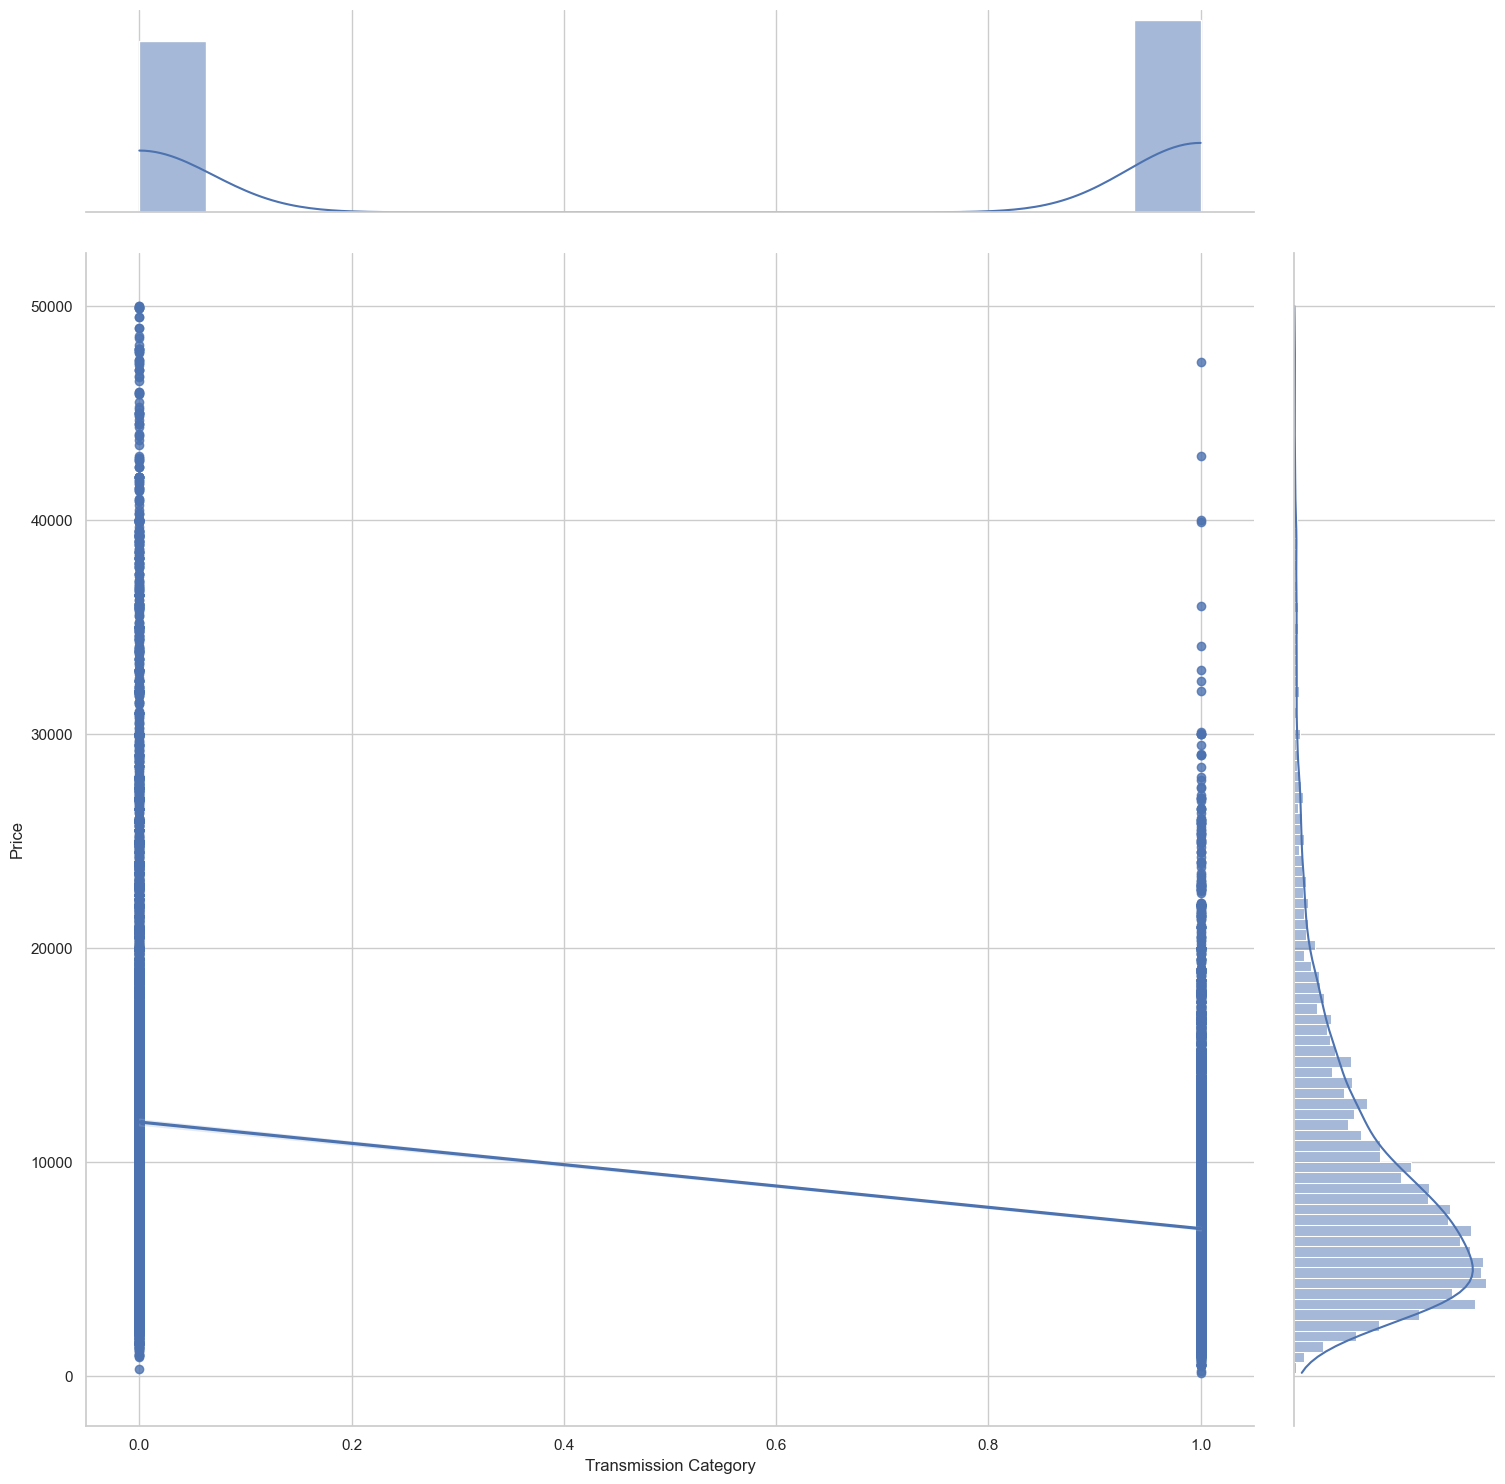

In [335]:
sns.jointplot(x='Transmission Category',y='Price',data=df_Carsales_b,kind='reg',height=15)

In [336]:
mask=df_Carsales[['Transmission','Transmission Category']]
mask = mask.drop_duplicates(subset=['Transmission','Transmission Category'])
mask =mask.sort_values(by='Transmission Category')
mask

Transmission  Transmission Category
0    automatic                      0
1   mechanical                      1

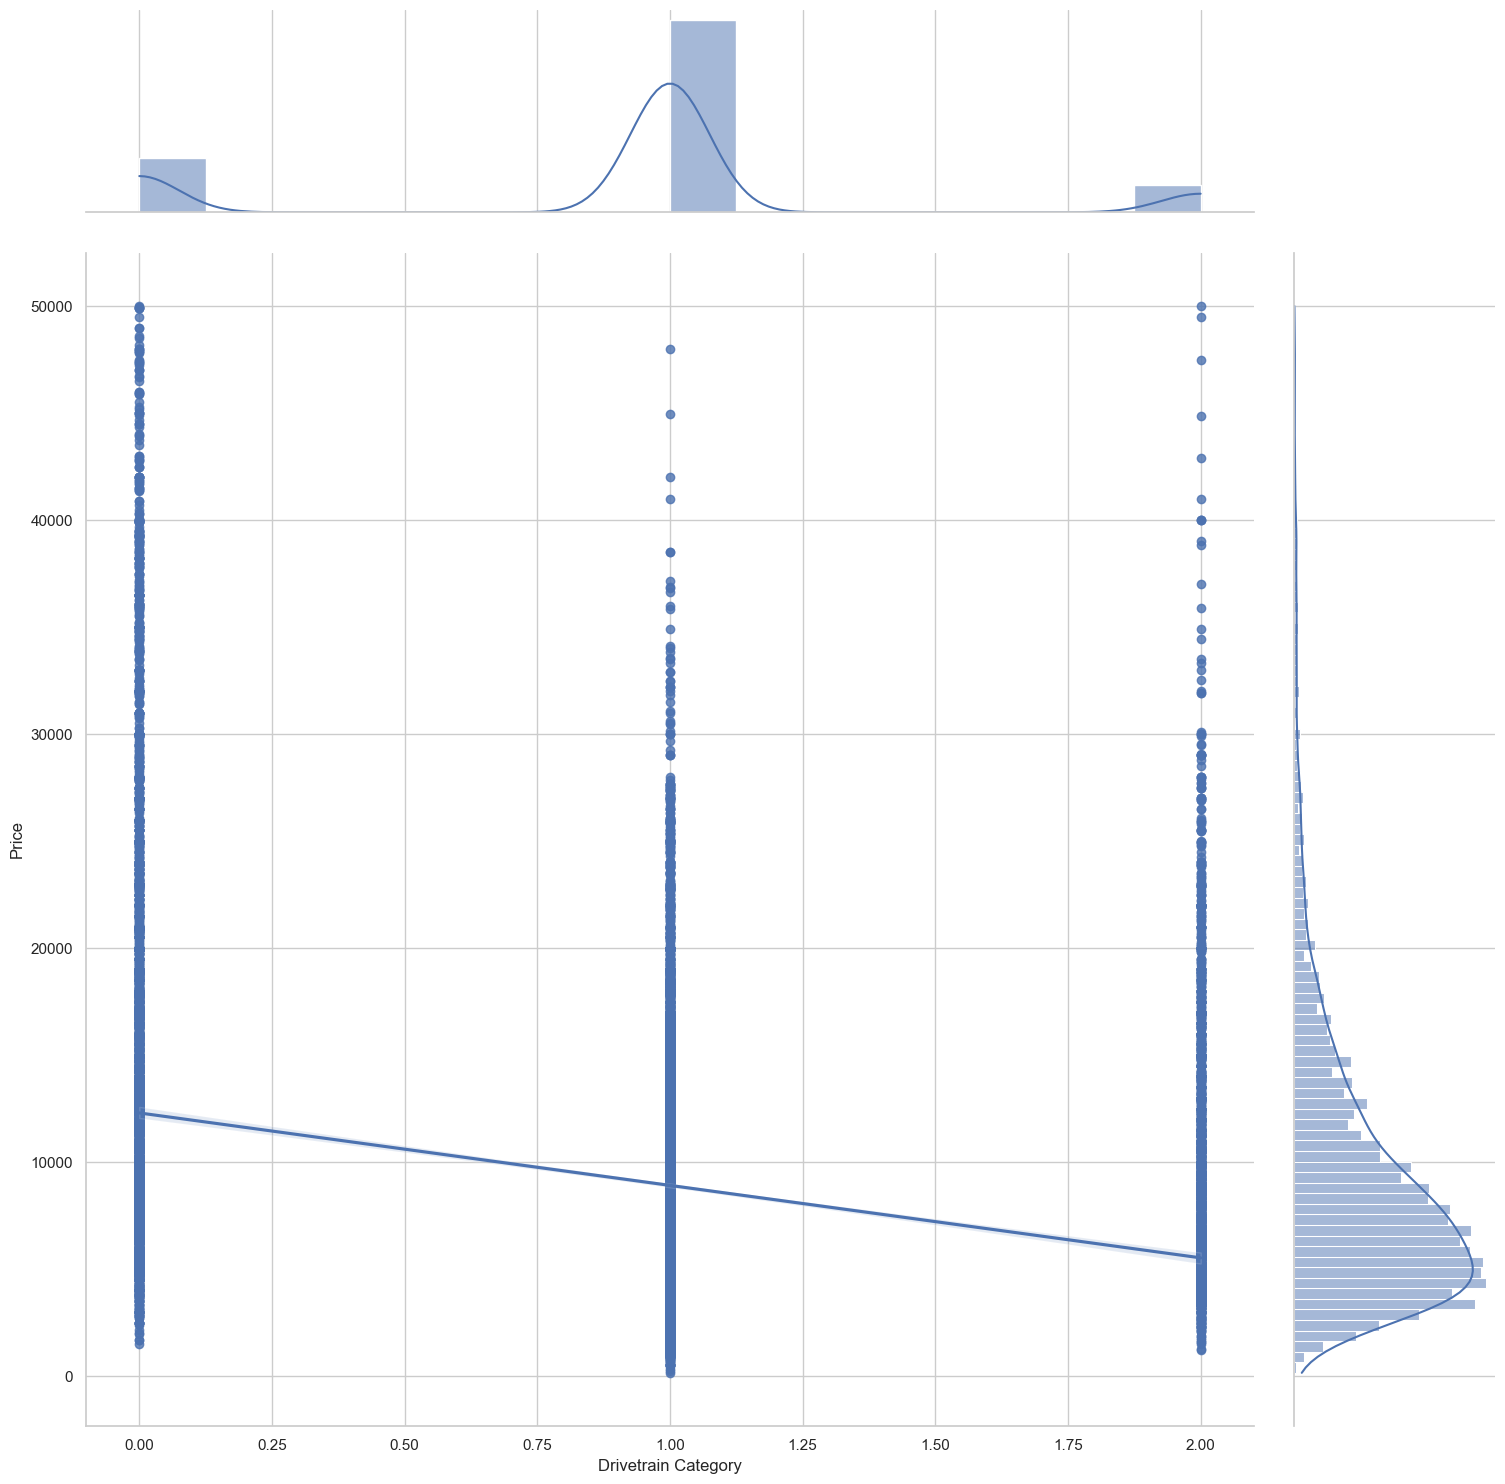

In [337]:
sns.jointplot(x='Drivetrain Category',y='Price',data=df_Carsales_b,kind='reg',height=15, ratio=5)

In [338]:
mask=df_Carsales[['drivetrain','Drivetrain Category']]
mask = mask.drop_duplicates(subset=['drivetrain','Drivetrain Category'])
mask =mask.sort_values(by='Drivetrain Category')
mask

drivetrain  Drivetrain Category
0          all                    0
1        front                    1
245       rear                    2

# MACHINE LEARNING

#Definiendo variables X y Y

In [339]:

df_ml=df_Carsales_b[['Price', 'Mileage_km','Year Old Category','Transmission Category','Drivetrain Category']]
df_ml

Price  Mileage_km  Year Old Category  Transmission Category  \
0       5000      389461                 19                      0   
1       6000      218871                 19                      1   
2       3850      200000                 17                      0   
3       8999      177028                 17                      0   
4       6500      345000                 17                      0   
...      ...         ...                ...                    ...   
19509  44023       48000                  3                      0   
19510  22900      128500                  3                      0   
19511  17900       40300                  2                      0   
19512  41400      114000                  2                      0   
19513  26500       17650                  1                      0   

       Drivetrain Category  
0                        0  
1                        1  
2                        1  
3                        0  
4                        0  
...                    ...  
19509                    0  
19510                    1  
19511                    0  
19512                    0  
19513                    0  

[19514 rows x 5 columns]

In [340]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19514 entries, 0 to 19513
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Price                  19514 non-null  int64
 1   Mileage_km             19514 non-null  int64
 2   Year Old Category      19514 non-null  int8 
 3   Transmission Category  19514 non-null  int8 
 4   Drivetrain Category    19514 non-null  int8 
dtypes: int64(2), int8(3)
memory usage: 362.2 KB


In [341]:
#Separando X - Y

In [342]:
x = df_ml.drop('Price',axis = 1)
x

Mileage_km  Year Old Category  Transmission Category  \
0          389461                 19                      0   
1          218871                 19                      1   
2          200000                 17                      0   
3          177028                 17                      0   
4          345000                 17                      0   
...           ...                ...                    ...   
19509       48000                  3                      0   
19510      128500                  3                      0   
19511       40300                  2                      0   
19512      114000                  2                      0   
19513       17650                  1                      0   

       Drivetrain Category  
0                        0  
1                        1  
2                        1  
3                        0  
4                        0  
...                    ...  
19509                    0  
19510                    1  
19511                    0  
19512                    0  
19513                    0  

[19514 rows x 4 columns]

In [343]:
#sns.kdeplot(df_ml['Price'])

In [344]:
y = df_ml['Price']
y

0         5000
1         6000
2         3850
3         8999
4         6500
         ...  
19509    44023
19510    22900
19511    17900
19512    41400
19513    26500
Name: Price, Length: 19514, dtype: int64

# MODELO DE REGRESION MULTIPLE

    

In [345]:
#2) Empezamos a crear nuestro modelo
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [346]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [347]:
#recuperamos intercepto
regressor.intercept_

21370.944502178878

In [348]:
#recuperamos pendiente
print(regressor.coef_)

[ 5.27614038e-03 -8.76265156e+02 -3.08837051e+03 -1.78728646e+03]


In [349]:
x.columns

Index(['Mileage_km', 'Year Old Category', 'Transmission Category',
       'Drivetrain Category'],
      dtype='object')

In [350]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

Coefficient
Mileage_km                0.005276
Year Old Category      -876.265156
Transmission Category -3088.370508
Drivetrain Category   -1787.286457

In [351]:
#Realizando las predicciones
y_pred = regressor.predict(x_test)
y_pred

array([12148.41702867,  6877.17451074,  9347.5607901 , ...,
        2798.2147426 , 10329.34875321, 13407.56961867])

In [352]:
y_test

9530     13800
385       5800
15308     7900
4153      2000
8658      8000
         ...  
829      14900
6423      6100
1602      7400
4165      1450
6956      9200
Name: Price, Length: 3903, dtype: int64

In [353]:
#Para comparar los valores de salida reales X_test con los valores predichos, convertimos en df:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df

Actual     Predicted        Sesgo  Error_porc
9530    13800  12148.417029  1651.582971   11.967993
385      5800   6877.174511 -1077.174511  -18.571974
15308    7900   9347.560790 -1447.560790  -18.323554
4153     2000   8075.585106 -6075.585106 -303.779255
8658     8000   9859.897235 -1859.897235  -23.248715
...       ...           ...          ...         ...
829     14900  13399.714004  1500.285996   10.069034
6423     6100   3345.608211  2754.391789   45.153964
1602     7400   2798.214743  4601.785257   62.186287
4165     1450  10329.348753 -8879.348753 -612.368880
6956     9200  13407.569619 -4207.569619  -45.734452

[3903 rows x 4 columns]

# Evaluar modelo de regresión

Evaluación del modelo:
El último paso es evaluar el rendimiento del algoritmo. Este paso es particularmente importante para comparar qué tan bien funcionan los diferentes algoritmos en un conjunto de datos en particular. Para los algoritmos de regresión, se utilizan comúnmente tres métricas de evaluación:
El error absoluto medio (MAE)
El error cuadrático medio (MSE)
Root Mean Squared Error (RMSE)

#PORCENTAJE DE R2

In [354]:
from sklearn.metrics import r2_score

In [355]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2=r2_score(y_test, y_pred)
acierto=round(r2*100,2)
print(f"el porcentaje de r2 (COEFICIENTE DE DETERMINACIÓN) es: {acierto} % de las veces se acierta en la predicción")


Mean Absolute Error (MAE): 3165.954452869151
Mean Squared Error (MSE): 21563437.382807747
Root Mean Squared Error (RMSE): 4643.644838142528
el porcentaje de r2 (COEFICIENTE DE DETERMINACIÓN) es: 52.18 % de las veces se acierta en la predicción


In [356]:
from sklearn.metrics import max_error
max_error(y_test, y_pred) #distancia maxima absoluta 


31822.823837582022

# Regresion Multiple usando Random forest

In [358]:
from sklearn.ensemble import RandomForestRegressor

In [359]:
# Creación del Modelo
rf_r=RandomForestRegressor(max_depth=4,random_state=11, n_estimators=100, )

# Entrenamiento del Modelo
rf_r.fit(x_train,y_train)

RandomForestRegressor(max_depth=4, random_state=11)

In [360]:
y_pred_rf=rf_r.predict(x_test)

In [361]:
dicc={'Test':y_test,'Predicción':y_pred_rf}
pd.DataFrame.from_dict(dicc)

Test    Predicción
9530   13800  10425.555903
385     5800   4001.193130
15308   7900   9624.345565
4153    2000   6650.797369
8658    8000   6650.797369
...      ...           ...
829    14900  14337.639820
6423    6100   4001.193130
1602    7400   6015.617956
4165    1450  10056.998687
6956    9200  14028.008354

[3903 rows x 2 columns]

In [362]:
r2_score(y_test,y_pred_rf)

0.6798081865913304

In [363]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
r2=r2_score(y_test, y_pred_rf)
acierto=round(r2*100,2)
print(f"el porcentaje de r2 (COEFICIENTE DE DETERMINACIÓN) es: {acierto} % de las veces se acierta en la predicción")

Mean Absolute Error (MAE): 2538.3028307107725
Mean Squared Error (MSE): 14438520.676277526
Root Mean Squared Error (RMSE): 3799.805347156289
el porcentaje de r2 (COEFICIENTE DE DETERMINACIÓN) es: 67.98 % de las veces se acierta en la predicción


In [364]:
from sklearn.metrics import max_error
max_error(y_test, y_pred_rf) #distancia maxima absoluta 

27051.94718755651

In [365]:
dicc_i={'Variable':x.columns,'Importancia':rf_r.feature_importances_}
pd.DataFrame.from_dict(dicc_i)

Variable  Importancia
0             Mileage_km     0.022030
1      Year Old Category     0.664159
2  Transmission Category     0.013630
3    Drivetrain Category     0.300181

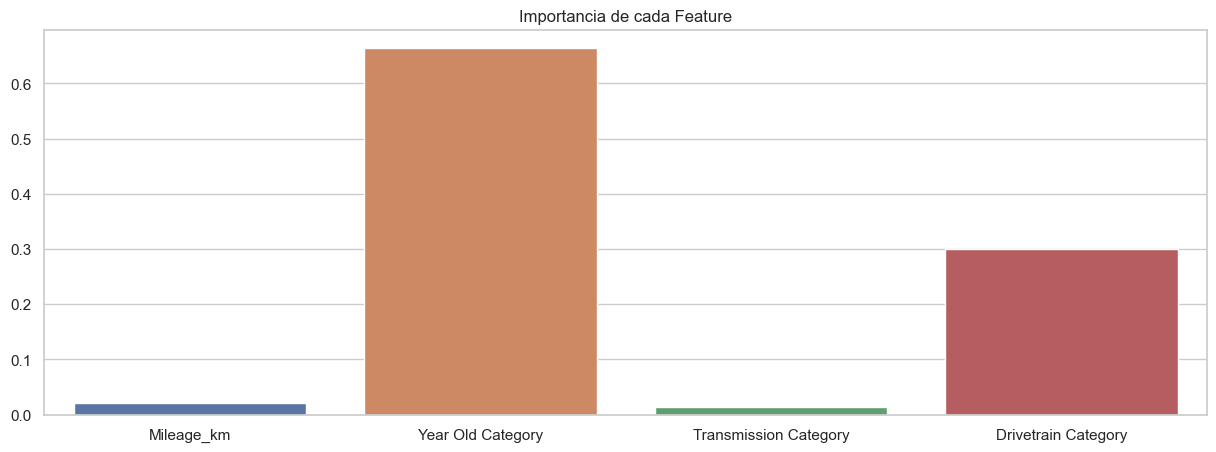

In [366]:
importances = rf_r.feature_importances_
columns = x.columns
sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada Feature')
plt.show()

# CONCLUSIONES


De la regresión lineal multiple:
    
    Mean Absolute Error (MAE): 3,165.95
    Mean Squared Error (MSE): 21,563,437.38
    Root Mean Squared Error (RMSE): 4,643.64
    r2 COEFICIENTE DE DETERMINACIÓN: 52.18 % de las veces se acierta en la predicción
        
        
Del modelo random forest:

    Mean Absolute Error (MAE): 2,538.30
    Mean Squared Error (MSE): 14,438,520.67
    Root Mean Squared Error (RMSE): 3,799.80
    r2 COEFICIENTE DE DETERMINACIÓN: 67.98 % de las veces se acierta en la predicción
        
       

El valor absoluto de los errores ( MAE ) es mayor en la regresión lineal múltiple (RLM) vs Random Forest (RF),
siendo que para la RLM  el máximo valor absoluto de error es de 31,822.82  y en para RF es de 27,051.94; en ambos
modelos un valor muy alto para el precio de un vehículo, gráficamente observamos que existen muchos puntos 
(registros-vehículos) por arriba de los 40000  en precio que pueden estar originando que sea tan alto el valor 
del error absoluto.

Para el MSE  la predicción en ambos modelos muestra grandes errores pero al hacer la comparativa con RMSE considerando 
que ambos modelos utilizan la misma escala o unidad de medida (precio) vemos que Random Forest nos da un menor margen de error 
promedio con  +- 3799.80  además de evaluar el Coeficiente de determinación que con RF podemos acertar en el 67.98% de 
las veces.

El siguiente paso es evaluar ambos modelos modelando sin la influencia de los puntos (vehículos con precios mayores a $40,000)


# Desafio: Ingeniera de datos y Seleccion de Variables

In [610]:
#librerias
import pandas as pd
import numpy as np
import datetime as dt
import calendar
import plotly.express as px

#librerias visuales
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Metric

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [611]:
#CARGAR DATASET
df_Carsales=pd.read_excel('Carsales_b.xlsx')
df_Carsales.head()

Date Customer Name                                      Dealer_Name  \
0 2021-09-24         Micah                                Chrysler Plymouth   
1 2021-07-05         Josue                               Diehl Motor CO Inc   
2 2021-10-28       Shloime                Scrivener Performance Engineering   
3 2021-10-28        Julian  Progressive Shippers Cooperative Association No   
4 2021-10-28      Mohammed                             Rabun Used Car Sales   

  Company    Model  Year Body Style Transmission   Color  Price  ...  \
0   Acura      MDX  2000        suv    automatic  silver   5000  ...   
1   Acura  Integra  2000  hatchback   mechanical   white   6000  ...   
2   Acura       TL  2002      sedan    automatic   white   3850  ...   
3   Acura      MDX  2002        suv    automatic  silver   8999  ...   
4   Acura      MDX  2002        suv    automatic  silver   6500  ...   

   engine_capacity drivetrain          Dealer_Add      Customer Address  \
0              3.5        all      4376 Ogden Ave  16/557 Glenferrie Rd   
1              1.8      front  8612 Research Blvd     26/670 Malvern Rd   
2              3.2      front  137 Green Tree Trl           1 Howell St   
3              3.5        all  8532 Research Blvd            22 Ross St   
4              3.5        all     3250 W Marie St       72 Bayswater Rd   

                CouncilArea Gender Annual Income     Dealer_Location  \
0   Boroondara City Council   Male        335000        6137 S Us-51   
1  Stonnington City Council   Male        888000        44 Walnut St   
2   Whittlesea City Council   Male        560000    3 Green Tree Trl   
3    Glen Eira City Council   Male        895000        6137 S Us-51   
4    Melbourne City Council   Male       1271000  6640 E McDowell Rd   

   Dealer_No  Dealer_Region  
0  53546-9427    Janesville  
1  06457-3834    Middletown  
2  38701-8047    Greenville  
3  53546-9427    Janesville  
4  85257-3102    Scottsdale  

[5 rows x 22 columns]

In [612]:
df_Carsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19514 entries, 0 to 19513
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              19514 non-null  datetime64[ns]
 1   Customer Name     19514 non-null  object        
 2   Dealer_Name       19514 non-null  object        
 3   Company           19514 non-null  object        
 4   Model             19514 non-null  object        
 5   Year              19514 non-null  int64         
 6   Body Style        19514 non-null  object        
 7   Transmission      19514 non-null  object        
 8   Color             19514 non-null  object        
 9   Price             19514 non-null  int64         
 10  Mileage_km        19514 non-null  int64         
 11  Fuel              19514 non-null  object        
 12  engine_capacity   19506 non-null  float64       
 13  drivetrain        19514 non-null  object        
 14  Dealer_Add        1951

In [613]:
df_Carsales.dropna(inplace=True)

In [614]:
df_Carsales.nunique()

Date                   61
Customer Name        2992
Dealer_Name            28
Company                49
Model                 805
Year                   20
Body Style             12
Transmission            2
Color                  12
Price                1788
Mileage_km           3478
Fuel                    4
engine_capacity        56
drivetrain              3
Dealer_Add           1784
Customer Address    19244
CouncilArea            33
Gender                  2
Annual Income        2309
Dealer_Location         7
Dealer_No               7
Dealer_Region           7
dtype: int64

In [615]:
df=df_Carsales.copy()

In [616]:
obj=list((df.dtypes=='object').index)
df[obj]=df[obj].astype('category')
df.head()

Date Customer Name                                      Dealer_Name  \
0 2021-09-24         Micah                                Chrysler Plymouth   
1 2021-07-05         Josue                               Diehl Motor CO Inc   
2 2021-10-28       Shloime                Scrivener Performance Engineering   
3 2021-10-28        Julian  Progressive Shippers Cooperative Association No   
4 2021-10-28      Mohammed                             Rabun Used Car Sales   

  Company    Model  Year Body Style Transmission   Color Price  ...  \
0   Acura      MDX  2000        suv    automatic  silver  5000  ...   
1   Acura  Integra  2000  hatchback   mechanical   white  6000  ...   
2   Acura       TL  2002      sedan    automatic   white  3850  ...   
3   Acura      MDX  2002        suv    automatic  silver  8999  ...   
4   Acura      MDX  2002        suv    automatic  silver  6500  ...   

  engine_capacity drivetrain          Dealer_Add      Customer Address  \
0             3.5        all      4376 Ogden Ave  16/557 Glenferrie Rd   
1             1.8      front  8612 Research Blvd     26/670 Malvern Rd   
2             3.2      front  137 Green Tree Trl           1 Howell St   
3             3.5        all  8532 Research Blvd            22 Ross St   
4             3.5        all     3250 W Marie St       72 Bayswater Rd   

                CouncilArea Gender Annual Income     Dealer_Location  \
0   Boroondara City Council   Male        335000        6137 S Us-51   
1  Stonnington City Council   Male        888000        44 Walnut St   
2   Whittlesea City Council   Male        560000    3 Green Tree Trl   
3    Glen Eira City Council   Male        895000        6137 S Us-51   
4    Melbourne City Council   Male       1271000  6640 E McDowell Rd   

   Dealer_No  Dealer_Region  
0  53546-9427    Janesville  
1  06457-3834    Middletown  
2  38701-8047    Greenville  
3  53546-9427    Janesville  
4  85257-3102    Scottsdale  

[5 rows x 22 columns]

In [617]:
for col in df[obj].columns:
    df[f'{col}']=df[f'{col}'].cat.codes


In [618]:
df.head()

Date  Customer Name  Dealer_Name  Company  Model  Year  Body Style  \
0    46           2086            3        0      0     0           9   
1    25           1437            7        0      1     0           2   
2    51           2595           23        0      2     2           8   
3    51           1453           18        0      0     2           9   
4    51           2123           19        0      0     2           9   

   Transmission  Color  Price  ...  engine_capacity  drivetrain  Dealer_Add  \
0             0      8    376  ...               29           0         690   
1             1     10    462  ...               12           1        1613   
2             0     10    258  ...               26           1          78   
3             0      8    696  ...               29           0        1531   
4             0      8    502  ...               29           0         427   

   Customer Address  CouncilArea  Gender  Annual Income  Dealer_Location  \
0              4813            2       1             91                4   
1              9083           27       1            997                3   
2               150           29       1            440                0   
3              8121            8       1           1008                4   
4             17380           18       1           1435                5   

   Dealer_No   Dealer_Region  
0           2              3  
1           0              4  
2           1              2  
3           2              3  
4           5              6  

[5 rows x 22 columns]

In [619]:
X=df.drop('Price',axis=1)
y=df.Price

In [620]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [621]:
rfr=RandomForestRegressor(max_depth=4,random_state=123)

In [622]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, random_state=123)

In [623]:
y_pred=rfr.predict(X_test)

In [624]:
r2_score(y_test,y_pred)

0.7782097105336425

In [625]:
pd.DataFrame.from_dict({'Variable':X.columns,'Importancia':rfr.feature_importances_})

Variable  Importancia
0               Date     0.000000
1      Customer Name     0.000000
2        Dealer_Name     0.000000
3            Company     0.000000
4              Model     0.000025
5               Year     0.716822
6         Body Style     0.000072
7       Transmission     0.000642
8              Color     0.000000
9         Mileage_km     0.017309
10              Fuel     0.000000
11   engine_capacity     0.264287
12        drivetrain     0.000845
13        Dealer_Add     0.000000
14  Customer Address     0.000000
15       CouncilArea     0.000000
16            Gender     0.000000
17     Annual Income     0.000000
18   Dealer_Location     0.000000
19        Dealer_No      0.000000
20     Dealer_Region     0.000000

### Este modelado del trabajo del trabajo es para encontrar nuevas variables que usar a futuro, en lugar a las que ya tenemos de correlacion. Debido a que se encuentran buenas metricas dentro de este modelado, que pueden ser utiles a futuro.


## PCA

In [626]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [675]:
df.head()

Date  Customer Name  Dealer_Name  Company  Model  Year  Body Style  \
0    46           2086            3        0      0     0           9   
1    25           1437            7        0      1     0           2   
2    51           2595           23        0      2     2           8   
3    51           1453           18        0      0     2           9   
4    51           2123           19        0      0     2           9   

   Transmission  Color  Price  ...  engine_capacity  drivetrain  Dealer_Add  \
0             0      8    376  ...               29           0         690   
1             1     10    462  ...               12           1        1613   
2             0     10    258  ...               26           1          78   
3             0      8    696  ...               29           0        1531   
4             0      8    502  ...               29           0         427   

   Customer Address  CouncilArea  Gender  Annual Income  Dealer_Location  \
0              4813            2       1             91                4   
1              9083           27       1            997                3   
2               150           29       1            440                0   
3              8121            8       1           1008                4   
4             17380           18       1           1435                5   

   Dealer_No   Dealer_Region  
0           2              3  
1           0              4  
2           1              2  
3           2              3  
4           5              6  

[5 rows x 22 columns]

In [677]:
pca2 = PCA(n_components=2, random_state=42)

In [678]:
pca_2 = pca2.fit_transform(X_train)

In [679]:
pca_2[:4]

array([[-0.69185806, -2.38376477],
       [ 2.2698063 ,  0.94626001],
       [-1.65378334,  0.51952672],
       [-1.42104607, -1.12188959]])

In [680]:
df_2 = pd.DataFrame({'PCA1': pca_2[:,0], 'PCA2': pca_2[:,1]})

In [681]:
df_2.head()

PCA1      PCA2
0 -0.691858 -2.383765
1  2.269806  0.946260
2 -1.653783  0.519527
3 -1.421046 -1.121890
4  0.514975 -2.085608

In [682]:
varianza_explicada = pca2.explained_variance_ratio_
varianza_explicada

array([0.10687054, 0.10351776])

In [683]:
pca2.explained_variance_ratio_.sum

<function ndarray.sum>

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

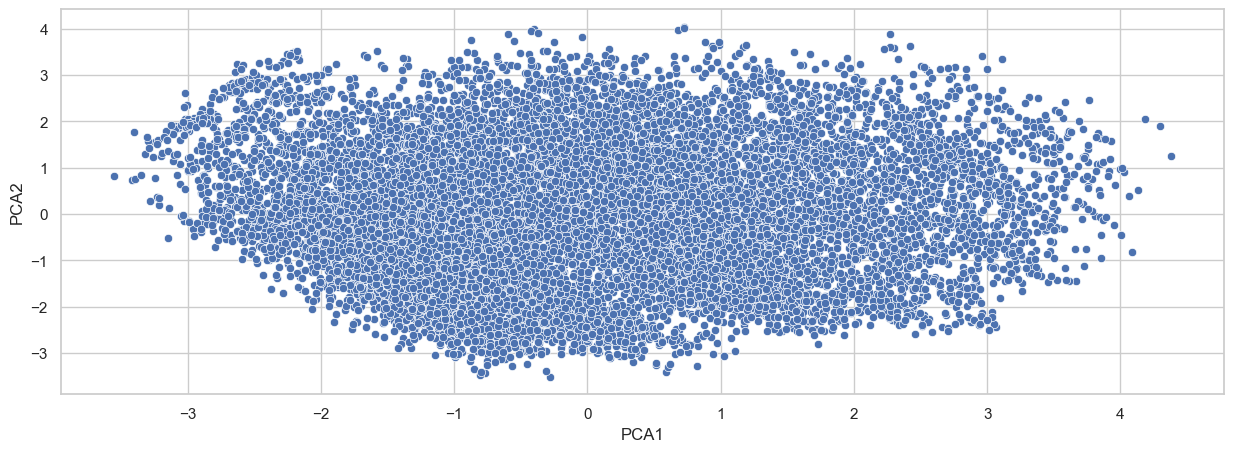

In [684]:
sns.scatterplot(x='PCA1', y= 'PCA2', data=df_2)

In [686]:
# Creacion del modelo
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(X_train, y_train)

#prediccion
y_pred = model_rf.predict(X_test)

In [689]:
y_test.shape, y_pred.shape

((5852,), (5852,))

In [669]:
# Evaluacion basica del modelo

accuracy = accuracy_score(y_test, y_pred)
print('el accuaracy del modelo es:', accuracy)

el accuaracy del modelo es: 0.02323991797676008


Random forest consiste en una gran cantidad de decision trees individual que operan como un ensemble. Cada tree individual define su prediccion de clase, y la clase con mas votos entre todos los arboles individuales, se vuelve la prediccion de nuestro modelo Random Forest.

# Regresion Multiple usando Random forest ( validación simple)

#VALIDACIÓN SIMPLE

Los valores anteriormente validados de forma simple:

De la regresión lineal multiple:
    
    Mean Absolute Error (MAE): 3,165.95
    Mean Squared Error (MSE): 21,563,437.38
    Root Mean Squared Error (RMSE): 4,643.64
    r2 COEFICIENTE DE DETERMINACIÓN: 52.18 % de las veces se acierta en la predicción
        
        
Del modelo random forest:

    Mean Absolute Error (MAE): 2,538.30
    Mean Squared Error (MSE): 14,438,520.67
    Root Mean Squared Error (RMSE): 3,799.80
    r2 COEFICIENTE DE DETERMINACIÓN: 67.98 % de las veces se acierta en la predicción
    
Vemos que el valor de MSE es 14,438,520.67    

# VALIDACION CV

In [178]:
# crear el procediemiento LOOCV
cv = LeaveOneOut()

In [179]:
#crear el modelo
from sklearn.ensemble import RandomForestRegressor

# Creación del Modelo
model_rf2_cv=RandomForestRegressor(max_depth=4,random_state=11, n_estimators=100, )

# K-fold validación

In [690]:
#Importar librerias para k-fold
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [691]:
#datos
df_ml

Price  Mileage_km  Year Old Category  Transmission Category  \
0       5000      389461                 19                      0   
1       6000      218871                 19                      1   
2       3850      200000                 17                      0   
3       8999      177028                 17                      0   
4       6500      345000                 17                      0   
...      ...         ...                ...                    ...   
19509  44023       48000                  3                      0   
19510  22900      128500                  3                      0   
19511  17900       40300                  2                      0   
19512  41400      114000                  2                      0   
19513  26500       17650                  1                      0   

       Drivetrain Category  
0                        0  
1                        1  
2                        1  
3                        0  
4                        0  
...                    ...  
19509                    0  
19510                    1  
19511                    0  
19512                    0  
19513                    0  

[19514 rows x 5 columns]

In [692]:
# Separa los datos en dos conjuntos: conjunto de entrenamiento y conjunto de prueba
from sklearn.model_selection import train_test_split

X = df_ml.drop('Price', axis=1)
y = df_ml['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [693]:
#Crea un objeto RandomForestRegressor y especifica los hiperparámetros deseados. 
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=11)

In [694]:
#Define el número de pliegues K para la validación cruzada:
kfold = KFold(n_splits=10, shuffle=True, random_state=11)

In [703]:
#Realiza la validación cruzada con K-fold:
mse_scores = []
for train_index, test_index in kfold.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    rf.fit(X_train_fold, y_train_fold)
    y_pred_fold = rf.predict(X_test_fold)
    mse = mean_squared_error(y_test_fold, y_pred_fold)
    mse_scores.append(mse)
    print(r2_score(y_pred_fold ,y_test_fold))
    
mean_mse = np.mean(mse_scores)

0.5577963080092664
0.6076902916067775
0.5993486277167395
0.5685091221549894
0.5638964247661054
0.5938503362285021
0.5305960509924605
0.5477151405511818
0.528320386487295
0.6084651788904923


In [700]:
#Entrena el modelo con el conjunto de entrenamiento completo:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=11)

In [701]:
#Evalúa el modelo con el conjunto de prueba:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

12738609.25412338

### CONCLUSIÓNES:

🔸En la validación simple sin CV el MSE es mayor (14,438,520.67)  vs con Kfol CV (12,738,609.25) 
Lo que significa que con el Kfold se logra aumentar el rendimiento del modelo aunque muy ligeramente REDUCIENDO el error cuadrático medio.




🔸Hasta aquí finalizamos con el estudio y el análisis de la aplicación de los modelos de Machine learning sobre nuestra prediccion
estimacion de precio para venta de autos usados. Pudimos ver, a modo de conclusión, cuales son los modelos que mejor trabajan sobre las variables de nuestro set de datos, de acuerdo a su composición.

🔸Finalizamos con la conclusión final de que el Modelo de predicción de Clasificación Random Forest es el acorde para nuestro proyecto debido a la problematica, los features, el set de datos en sí y los objetivos planteados.

## ⚡ Gracias Arturo y Alex ⚡